# SNLP 2021 Final Project

Name 1: <br/>
Student id 1: <br/>
Email 1: <br/>


Name 2: <br/>
Student id 2: <br/>
Email 2: <br/> 

**Instructions:** Your final submission should contain _a separate Notebook_ (not including our instructions). You may also implement your code in different Python files and show the output in the Notebooks. In this case, make sure you submit your Python files as well. Do not submit the data files and any other debug output. Your submission should have a clear structure and should be easy to follow. Other instructions to follow have been given in detail with the project problem statement. Read them carefully.

Upload the zipped folder in Teams. Only one member from the group should make the submission. The deadline for the project submission is August 20th, 2021 (23:59 pm). 

## **1 Data Preparation (12 points)**

We will use an English corpus that you already know from the assignments (*Alice in Wonderland*), and a Bengali corpus that is decidedly different in both context and language structure. You can find the corpora in `data/bengali_corpus.txt` and `data/alice_in_wonderland.txt`.

1. Preprocess both corpora such that they can serve as the input to sentencepiece. (8 points)

2. Split the preprocessed corpus into a train and a test set. The test set should comprise 20% of the corpus. Write the two sets to files `train.txt` and `test.txt` (4 points)

# Preprocessing
----

## Some facts about the two corpus:
1. **English**: Since the raw corpus is in small print-like format, we extracted the data by removing "\n" at the end of every line in the corpus. Joined them, and splitted them based on end-of-the sentense punctuations. In this way we are able to get proper sentences.

2. **Bengali**: We did the same split (for extracting actual lines) as we did for English corpus. However, in the raw corpus 1 big line was sometime containing multiple lines. We extracted lines while preprocessing too. 


**More Information**: As Bengali corpus was biased, meaning - around first 30-40% extracted sentences were from some sort of weird Bengali chats (including - slangs, swear-words, and etc etc.) and the rest were of Religias topics. So 80-20% train and test will contain biased data. So, we shuffled extracted sentences to see if that makes an effect on the OOV rates. 

*Shuffled corpus and results will follow **random_rest-of-the-name** tags.*

*Un-shuffled corpus will have - **normal_rest-of-the-name** tags.*



## We have done 2 types of pre-processing on **Bengali corpus**.
1. **Normal level preprocessing**: We removed the following -
    - HTML tags.
    - Dublicate punctuations.
    - Extra back-to-back whitespaces.
    - Reducing duplicate back-to-back punctuations to one.
    - Removing invalid character and unicodes.
    - Removing English-letter emojis.
    - Removing English words/characters.
*Naming Scheme* - **random_bn_super** or **normal_bn_super** 
<br><br>

2. **Super level preprocessing**: We removed the following -
    - *Everything that was done in Normal level*.
    - All emojis.
    - All numbers.
    - All punctuations.
*Naming Scheme* - **random_bn** or **normal_bn** 
<br><br>

### We have done 3 types of pre-processing on **English corpus**.
1. **Normal level preprocessing**: We removed the following -
    - Extracted sentences first in usual format.
    - Split on the basic of end-of-the sentence punctuations.
    - Removing uncecessary punctuations.
    - Removing repeatations of punctiations. 
<br><br>
2. **Mid level preprocessing**: We removed the following -
    - *Everything that was done in Normal level*.
    - Removed all the numbers.
    - Removed all punctiations.<br>
<br><br>
3. **Super level preprocessing**: We removed the following -
    - *Everything that was done in Mid level*.
    - Lowercased everything.

In [47]:
# Checking characters in bengali corpus.

with open('data/bengali_corpus.txt', 'r') as fh:
    chars = []
    for line in fh:
        for char in line:
            if char not in chars:
                chars.append(char)
print(chars)

['য', 'ত', '্', 'স', 'ব', ' ', 'প', 'া', 'ন', 'শ', 'ল', 'র', 'ফ', 'জ', 'ম', 'ী', '!', 'ে', 'ি', 'ড', 'ও', 'য়', 'দ', 'ক', 'ু', 'হ', 'ছ', 'এ', 'ো', 'ড়', 'ট', 'ষ', 'ভ', '।', 'ধ', 'ই', 'চ', 'খ', 'ঠ', 'গ', 'থ', 'উ', 'ঝ', 'ণ', 'আ', 'ঘ', '়', '?', 'অ', 'ং', 'ঁ', '১', '<', 'b', 'r', '/', '>', 'a', 'h', 'e', 'f', '=', '"', 't', 'p', ':', 'w', '.', 'y', 'o', 'u', 'c', 'm', 's', 'l', '_', 'q', '%', '2', '3', 'd', 'i', 'n', '#', 'ঞ', 'ৱ', 'ৰ', '৷', 'ূ', 'ৈ', ',', 'ৃ', 'ঙ', 'ঃ', '-', 'ঢ', 'x', '৭', '\n', 'ঐ', 'ৌ', '\u200c', '(', ')', 'ৎ', 'ঈ', '৪', '৩', '*', 'v', 'g', '|', '6', 'M', '…', '০', '🇧', '🇩', ';', 'k', '1', 'C', '৮', 'ঔ', '৫', '\u09e4', '0', 'j', 'T', '২', '৯', '\u200d', '4', '8', '7', '9', '\xa0', '️', '“', '৬', '+', '5', '’', 'S', 'O', '&', 'ঊ', '॥', 'ৗ', '🇫', '🇴', 'ঋ', "'", '—', '★', 'Y', 'z', 'N', 'P', 'A', 'E', 'U', 'L', 'I', 'K', 'D', 'H', '@', '‘', '\ufeff', 'Ä', 'â', 'R', 'ã', 'å', 'ñ', 'F', 'Z', 'B', '\xad', '”', '`', '↓', '🇱', '🇷', 'V', 'J', 'X', 'ঢ়', 'G', '\u200b', '🇮', '🇳', '¡

In [39]:
# Preprocess Bengali Coprus
#
#
# Normal level preprocessing (normal_bn)






from bs4 import BeautifulSoup
import re

cleaned = []
with open("data/bengali_corpus.txt", "r") as file:
    for line in file:
        # Removing html tags
        line = BeautifulSoup(line,"html.parser").get_text()
        
        # Removing all english characters, including digits
        line = re.sub("(?:[a-zA-Z0-9])","",line)
        
        # Removing dublicate punctuations
        chars = '''!?,.।/*_-:()<>="#;%'|…৷'''
        
        for char in chars:
            line = re.sub("[" + char + "]" + "+", char, line)
        
        # Removing extra white space
        line = re.sub(" +", " ", line)
        
        cleaned.append(line)

In [49]:
bn_lines = []
for line in cleaned:
    # Replacing repeated punc to only one
    chars = '''!?.।;'''
    for char in chars:
        line = line.replace(char, char+"\n")
    
    # Removing invalid and unicode characters
    chars = ['\u200c', '\u09e4', '\u200d', '\xa0', '“', '+', '’', '॥', '&', '—', '★', '‘', '\ufeff', 'Ä', 'â', 'ã', 'å', 'ñ', '\xad', '”', '`', '↓', '\u200b', '¡', '\U000e0067', '\U000e0062', '\U000e0065', '\U000e006e', '\U000e007f', '♬', '@', 'т', 'ι', '~', '\ufff0', '{', '}', '℅', '≈', '–']
    for char in chars:
        line = line.replace(char, "")
    
    # Removing Emojis
    compiler = re.compile(pattern = "["u"\U0001F600-\U0001F64F"u"\U0001F300-\U0001F5FF"u"\U0001F680-\U0001F6FF"u"\U0001F1E0-\U0001F1FF""]+", flags = re.UNICODE)
    line = compiler.sub(r'', line)
        
    temp = line.split("\n")
    
    for item in temp:
        bn_lines.append(item.strip())

# Removing empty strings
bn_lines = list(filter(None, bn_lines))

# Removing back-to-back punc (.?!)
for line in bn_lines:
    if len(line) <= 4:
        bn_lines.remove(line)

In [50]:
#bn_lines[:100]

# Writing it to a new text file for Segmentation
with open("data/processed/bn.txt", 'w') as file:
    for line in bn_lines:
        file.write(line + "\n")

In [51]:
# Checking repeated characters in our corpus
repeat = []
for line in bn_lines:
    for i in range(len(line)):
        if i+1 == len(line):
            break
        else:
            if line[i] == line[i+1]:
                if line[i] not in repeat:
                    repeat.append(line[i])

print(repeat)

['ক', 'ল', 'স', 'ে', 'ৱ', 'ু', 'শ', 'ন', 'ত', 'া', 'র', 'চ', 'দ', 'প', 'ম', 'গ', 'ই', 'থ', '্', 'ব', 'য', '০', 'জ', 'ও', 'খ', 'ছ', '️', ' ', 'ো', 'ট', 'ৃ', 'ষ', 'আ', '=', '৯', 'উ', 'হ', 'ফ', '১', 'য়', 'ৰ', '৬', 'অ', '২', '৩', '৪', '৫', '৭', 'এ', 'ি', 'ভ']


In [52]:
# Bengali corpus without any -
        # Emojis
        # Numbers
        # Punctuations

bn_scleaned = []
for line in bn_lines:

    # Numbers
    line = re.sub("(?:[০-৯])", "", line)

    # Punctuation
    chars = '''!?,.।/*_-:()<>="#;%'|…৷'''
    for char in chars:
        line = re.sub('''(?:[''' + char + '''])''', "", line)
    
    bn_scleaned.append(line)

#bn_scleaned[:100]

with open("data/processed/bn_super.txt", 'w') as file:
    for line in bn_scleaned:
        file.write(line + "\n")

In [54]:
with open('data/processed/bn_super.txt', 'r') as fh:
    chars = []
    for line in fh:
        for char in line:
            if char not in chars:
                chars.append(char)
print(chars)

['য', 'ত', '্', 'স', 'ব', ' ', 'প', 'া', 'ন', 'শ', 'ল', 'র', 'ফ', 'জ', 'ম', 'ী', '\n', 'ে', 'ি', 'ড', 'ও', 'য়', 'দ', 'ক', 'ু', 'হ', 'ছ', 'এ', 'ো', 'ড়', 'ট', 'ষ', 'ভ', 'ধ', 'ই', 'চ', 'খ', 'ঠ', 'গ', 'থ', 'উ', 'ঝ', 'ণ', 'আ', 'ঘ', '়', 'অ', 'ং', 'ঁ', 'ঞ', 'ৱ', 'ৰ', 'ূ', 'ৈ', 'ৃ', 'ঙ', 'ঃ', 'ঢ', 'ঐ', 'ৌ', 'ৎ', 'ঈ', 'ঔ', '️', 'ঊ', 'ৗ', 'ঋ', 'ঢ়', '꫰']


In [63]:
# Preprocessing of English Corpus







raw_lines = []
with open("data/alice_in_wonderland.txt", "r") as file:
    for line in file:
        raw_lines.append(line)

In [64]:
# Very Mild-preprocessing


huge_string = ""


for line in raw_lines:
    huge_string += line.rstrip() + " "
    
# Remove extra space
huge_string = re.sub(" +", " ", huge_string)

# Split sentences
end_punc = "!.?"
for punc in end_punc:
    huge_string = huge_string.replace(punc, punc+"\n")

# Remove speciall characters
sp_chars = '''`()[];:"'*_[]'''
for char in sp_chars:
    huge_string = re.sub("[" + char + "]", "", huge_string)


# Remove repeatations of punctuation
huge_string = re.sub("-+", "-", huge_string)


# Splitting into lines
lines = huge_string.split("\n")

en_lines = []
for line in lines:
    en_lines.append(line.strip())

with open("data/processed/en.txt", 'w') as file:
    for line in en_lines:
        file.write(line + "\n")

In [65]:
# Preprocessing level - Mid


# Remove numbers
huge_string = re.sub("[0-9]", "", huge_string)

# Remove Punctuations
puncs = ",!.?-"
for punc in puncs:
    huge_string = re.sub("[" + punc + "]", "", huge_string)

# Splitting into lines
lines = huge_string.split("\n")

en_lines = []
for line in lines:
    en_lines.append(line.strip())

with open("data/processed/en_mid.txt", 'w') as file:
    for line in en_lines:
        file.write(line + "\n")

In [66]:
# Preprocessing level - Super

# Lowercase everything
huge_string = huge_string.lower()

# Splitting into lines
lines = huge_string.split("\n")

en_lines = []
for line in lines:
    en_lines.append(line.strip())

with open("data/processed/en_super.txt", 'w') as file:
    for line in en_lines:
        file.write(line + "\n")

In [68]:
with open('data/processed/en_super.txt', 'r') as fh:
    chars = []
    for line in fh:
        for char in line:
            if char not in chars:
                chars.append(char)
print(chars)

['a', 'l', 'i', 'c', 'e', 's', ' ', 'd', 'v', 'n', 't', 'u', 'r', 'w', 'o', 'h', 'm', 'f', '\n', 'p', 'b', 'g', 'y', 'k', 'q', 'j', 'x', 'z']


In [71]:
# Train-Test Split
# Without randomization






import os
import random 

files = os.listdir('data/processed')
for file in files:
    with open('data/processed/' + file, 'r') as fhandler:
        temp = []
        for line in fhandler:
            temp.append(line)
    
    total = len(temp)
    
    train = temp[ : int(total*0.8)]
    test = temp[int(total*0.8) : ]
    
    with open('data/train/' + file, 'w') as fhandler:
        for line in train:
            fhandler.write(line)
            
    with open('data/test/' + file, 'w') as fhandler:
        for line in test:
            fhandler.write(line)

In [72]:
# With randomization (line shuffling)


files = os.listdir('data/processed')
for file in files:
    with open('data/processed/' + file, 'r') as fhandler:
        temp = []
        for line in fhandler:
            temp.append(line)
            
    # Shuffling data
    temp = random.sample(temp, len(temp))
    
    total = len(temp)
    
    train = temp[ : int(total*0.8)]
    test = temp[int(total*0.8) : ]
    
    with open('data/r_train/' + file, 'w') as fhandler:
        for line in train:
            fhandler.write(line)
            
    with open('data/r_test/' + file, 'w') as fhandler:
        for line in test:
            fhandler.write(line)

# **2 Subword Segmentation (16 points)**



You are asked to create data for a language model based on different subword granularity, namely:

**2.3.1**. Characters. This can be done manually but also by running BPE with the output vocabulary size being the same as the input alphabet size. (4 points) <br>
**2.3.2**. Subword Units: smaller vocabulary, closer to characters. The vocabulary size is usually in the range of 100 to 800 for English. (6 points) <br>
**2.3.3**. Subword Units: larger vocabulary, closer to words. The vocabulary size is usually in the range 1500 to 3000 for English. (6 points)

In 2 and 3, try to experiment with multiple values and pick one to get the best performance. 

## Our Approach
----

### How is our corpus looking now?

So after done with preprocessing, we are left with - 

**English Corpus**:<br>
    - *random_en_super* <br>
    - *random_en_mid*<br>
    - *random_en*<br>
    - *normal_en_super*<br>
    - *normal_en_mid*<br>
    - *normal_en*<br>

**Bengali Corpus**:<br>
    - *random_bn_super*<br>
    - *random_bn*<br>
    - *normal_bn_super*<br>
    - *normal_bn*<br>
    
**Note**: **random_rest-of-the-model-name** *meaning corpus is having shuffled sentences*.
    
**In total**: we have **10 types of corpus** to experiment with. In final stage, we will conclude based on that (al least some intuitions on how our preprocessing is effecting the results).

**Task - 2.3.1**: Our character level implementation is simple enough. First, we have extracted characters from our corpus. Then, we have used them to train the Sentencepiece models. Corresponding characters -

```python
                   class_size
random_en_super    28
random_en_mid      54      
random_en          61

random_bn_super    69
random_bn          102


normal_en_super    28
normal_en_mid      54
normal_en          61

normal_bn_super    69
normal_bn          102

```
This also indicates how we reduced characters with our preprocessing from 72 > 61 > 54 > 28 (raw file, *mild*, *mid*, and *super*, correspondingly) with our preprocessing for **English** corpus.

For **Bengali** corpus - 214 > 102 > 69 (raw file, *mild*, and *super*, correspondingly).

**Task - 2.3.2**: Straight up checking on a certain value ranging from 100 - 800, we wanted to check for which value of ```vocab_size``` it is giving us the lowest OOV rate in later stage. The following suitable (best performing) vocabulary values are -

```python
                            class_size
random_en_super    400      390
random_en_mid      300      296
random_en          400      393

random_bn_super    800      798
random_bn          800      798


normal_en_super    500      487
normal_en_mid      500      491
normal_en          500      491

normal_bn_super    600      598
normal_bn          800      798

```

**Task - 2.3.3**: We did same kind of experiment for a gap of 200 raging from 1500-3000 for ```vocab_size``` value for generating Sentencepiece models. The following suitable (best performing) vocabulary values are -

```python
                             class_size
random_en_super    1900      1700
random_en_mid      2100      1878
random_en          2900      2404

random_bn_super    2700      2697
random_bn          2900      2895


normal_en_super    1500      1379
normal_en_mid      2100      1874
normal_en          2900      2404

normal_bn_super    2900      2896
normal_bn          2900      2897
```

**Important Note:** We can see that, since Bengali is morphologically rich, larger vocabulary resulted in gaining better OOV rates (can be seen in the later tasks). Even, this trend is shown in our preprocessing levels too. As, the *super* models are contaning less punctuations and contadictory characters (which, according to us will result in back text output) are tend to do good with a  lower vocabulary size for tasks **2.3.2** and **2.3.3**. As the we included more character and punctuations in shallower (*en_mid* or *en*) preprocessed corpus, the larger vocabulary size helped us gaining a greater OOV rate. For example - 

```python
random_en_super    1900
random_en_mid      2100
random_en          2900
```

However, shuffled corpus (*random*) effect is not shown here. But we will come into that with the workflow.



#### Comments on the Generated Training files (.txt)
1. Character level: **Task 2.3.1**, the ouput file for *normal_bn_super* and *normal_bn* has lines like this - 

```python
# normal_bn_super
▁ য ত ্ ত স ব ▁ প া প ন ▁ শ া ল ার ▁ ফ া জ ল া ম ী

# normal_bn
▁ য ত ্ ত স ব ▁ প া প ন ▁ শ া ল ার ▁ ফ া জ ল া ম ী !


# normal_en_super
▁ a l i c e s ▁ a d v e n t u r e s ▁ i n ▁ w o n d e r l a n d ▁ a l i c e s ▁ a d v e n t u r e s ▁ i n ▁ w o n d e r l a n d ▁ l e w i s ▁ c a r r o l l ▁ t h e ▁ m i l l e n n i u m ▁ f u l c r u m ▁ e d i t i o n

# normal_en
▁ A l i c e s ▁ A d v e n t u r e s ▁ i n ▁ W o n d e r l a n d ▁ A L I C E S ▁ A D V E N T U R E S ▁ I N ▁ W O N D E R L A N D ▁ L e w i s ▁ C a r r o l l ▁ T H E ▁ M I L L E N N I U M ▁ F U L C R U M ▁ E D I T I O N ▁ 3 .
```

We can see, every character is seperated using " " (empty space). Somehow, English is redable. However, because of Bengali variations in Bengali characters, it is not somewhat readable. 

2. Subword Units (smaller vocabulary): **Task 2.3.2**, some output -

```python
# random_en (best-case vocabulary size - 400; ouput from the same model)
▁I ve ▁re ad ▁that ▁in ▁some ▁b ook , ▁but ▁I ▁dont ▁re me mb er ▁whe re .

# random_en_super (best-case vocabulary size - 400; ouput from the same model)
▁i ▁should ▁like ▁to ▁he ar ▁her ▁t ry ▁and ▁rep e at ▁some thing ▁now

# normal_en_super (best-case vocabulary size - 500; ouput from the same model)
▁Alice s ▁A d v ent ure s ▁in ▁W o nder l and ▁A L I C E S ▁A D V E N T U R E S ▁I N ▁W O N D ER L A N D ▁L e w is ▁C ar ro ll ▁T H E ▁M I L L E N N I U M ▁F U L C R U M ▁E D I T I O N ▁ 3 .

# random_en (best-case vocabulary size - 500; ouput from the same model)
▁alice s ▁a d v ent ure s ▁in ▁wonder l and ▁alice s ▁a d v ent ure s ▁in ▁wonder l and ▁le w is ▁c ar ro ll ▁the ▁m ill en n i u m ▁f u l c r u m ▁ ed it ion
```

We can see, the segmented words are now looking more like words. Still containing meaningfull parts which can be common in many words. For example - **ook** from *random_en*. Which is can be used to form words like - *look*, *book* and etc. Parts like this is much better to feed to the RNN model. Which will have a tendency to generate meaningful other words.

3. Subword Units (larger vocabulary): **Task 2.3.3**, some output -

```python
# normal_en (best-case vocabulary size - 2900; ouput from the same model)
▁Alices ▁Adv ent ures ▁in ▁W o nder l and ▁ALICES ▁A DVE NT UR ES ▁IN ▁W O NDER L AN D ▁L ew is ▁C ar ro ll ▁THE ▁M ILL EN N I UM ▁F U L CRU M ▁E DIT I ON ▁ 3 .

# normal_en_super (best-case vocabulary size - 1500; ouput from the same model)
▁alices ▁adv ent ures ▁in ▁wonder l and ▁alices ▁adv ent ures ▁in ▁wonder l and ▁le w is ▁car ro ll ▁the ▁m ill en n i u m ▁f u l c ru m ▁ed it ion
```

Because of our preprocessing everything is lowecased on *super* models. However, we can see for larger vocabulary (task 2.3.3) got bigger segmentations of texts than task 2.3.2. And much variations in the vocabulary. Which is also, better for RNNLM. Our theory is, it will lower the OOV rates compared to 2.3.2 and 2.3.1. And, for Linguistics people, we will be able to find more natural meaning from texts.

## TODO: no_rush

In [21]:
# Task 2.3.1
# char level _s1 

import os

location = 'data/r_train/'
files = os.listdir(location)
info = []
for file in files:
    vocab = []
    with open(location + file, 'r') as fh:
        for line in fh:
            for char in line:
                if char not in vocab:
                    vocab.append(char)
    info.append((file, len(vocab)+2))

In [ ]:
files = ['r_train', 'r_test', 'test', 'train']

for item in files:
    for tup in info:
        model_name = tup[0].replace('.txt', '')
        if 'r_' in item:
            model_type = 'random'
        else:
            model_type = 'normal'
        
        if 'train' in item:
            train_test = 'train_s1'
        else:
            train_test = 'test_s1'
        
        vocab = tup[1]
        input_file = tup[0]

        !spm_train \
            --input=data/$item/$input_file \
            --model_prefix=model/$train_test/$model_type/$model_name \
            --vocab_size=$vocab \
            --character_coverage=1.0 \
            --model_type=bpe

In [ ]:
# Generating models (kind of manually setting up data | just in this cell :)
# Task
# For 2.3.2  _s2 
# For 2.3.3 _s3

import os
files = os.listdir('data/r_test/')

for file in files:
    #for i in range(1500, 3000, 200):
    for i in range(100, 900, 100):
        model_folder = file.replace('.txt', '')
        model_name = file.replace('.txt', '_' + str(i))
        
        !spm_train \
            --input=data/r_test/$file \
            --model_prefix=model/test_s2/random/$model_folder/$model_name \
            --vocab_size=$i \
            --character_coverage=1.0 \
            --model_type=bpe

In [26]:
# Segmentation into Character level

model_types = os.listdir('model/')
corpus_types = os.listdir('model/train_s2/')
text_types = os.listdir('model/train_s2/normal/')

for text_type in text_types:
    for vocab_folder in model_types:
        for corpus_variation in corpus_types:
            
            if vocab_folder == "train_s1":
                if corpus_variation == "normal":
                    text_file = "/home/snlp-project-21/Downloads/Project/data/train/" + text_type + ".txt"
                else:
                    text_file = "/home/snlp-project-21/Downloads/Project/data/r_train/" + text_type + ".txt"
                    
            if vocab_folder == "test_s1":
                if corpus_variation == "normal":
                    text_file = "/home/snlp-project-21/Downloads/Project/data/test/" + text_type + ".txt"
                else:
                    text_file = "/home/snlp-project-21/Downloads/Project/data/r_test/" + text_type + ".txt"
                
            if vocab_folder == "train_s1" or vocab_folder == "test_s1":
                model_name = '/home/snlp-project-21/Downloads/Project/model/' + vocab_folder + "/" + corpus_variation + "/" + text_type  + ".model"
                segment_file = '/home/snlp-project-21/Downloads/Project/segmented/' + vocab_folder + "/" + corpus_variation  + "/" + text_type + ".txt"
                
                !spm_encode \
                  --model=$model_name \
                  --output_format=piece \
                  < $text_file \
                  > $segment_file

In [18]:
# Doing all Segmentation for train-test > tasks 2.3.2 and 2.3.3 > bn-en

import os
model_types = os.listdir('model/')
corpus_types = os.listdir('model/train_s2/')
text_types = os.listdir('model/train_s2/normal/')

for text_type in text_types:
    for vocab_folder in model_types:
        for corpus_variation in corpus_types:
            
            if vocab_folder == "train_s2" or vocab_folder == "train_s3":
                if corpus_variation == "normal":
                    text_file = "/home/snlp-project-21/Downloads/Project/data/train/" + text_type + ".txt"
                else:
                    text_file = "/home/snlp-project-21/Downloads/Project/data/r_train/" + text_type + ".txt"
                    
            else:
                if corpus_variation == "normal":
                    text_file = "/home/snlp-project-21/Downloads/Project/data/test/" + text_type + ".txt"
                else:
                    text_file = "/home/snlp-project-21/Downloads/Project/data/r_test/" + text_type + ".txt"
                
            if vocab_folder == "train_s2" or vocab_folder == "test_s2":
                for s2 in range(100, 900, 100):
                    model_name = '/home/snlp-project-21/Downloads/Project/model/' + vocab_folder + "/" + corpus_variation + "/" + text_type + "/" + text_type + "_" + str(s2) + ".model"
                    segment_file = '/home/snlp-project-21/Downloads/Project/segmented/' + vocab_folder + "/" + corpus_variation + "/" + text_type + "/" + text_type + "_" + str(s2) + ".txt"
                    
                    !spm_encode \
                      --model=$model_name \
                      --output_format=piece \
                      < $text_file \
                      > $segment_file


            else:
                for s3 in range(1500, 3000, 200):
                    model_name = '/home/snlp-project-21/Downloads/Project/model/' + vocab_folder + "/" + corpus_variation + "/" + text_type + "/" + text_type + "_" + str(s3) + ".model"
                    segment_file = '/home/snlp-project-21/Downloads/Project/segmented/' + vocab_folder + "/" + corpus_variation + "/" + text_type + "/" + text_type + "_" + str(s3) + ".txt"


                    !spm_encode \
                      --model=$model_name \
                      --output_format=piece \
                      < $text_file \
                      > $segment_file

## **3 LM Training (20 point)**

1. Now, train 3 language models based on the corpora you created in 2.3. We will do this using the RNNLM toolkit. The RNN model is trained on the subword units you have created using SentencePiece. As with all neural models, the performance and computation times depend on the number of hidden layers, backpropagation parameter. The class size is used to implement a class-based language model. <br/>  (8 points)


2. After training, the rnnlm toolkit outputs the perplexity of the trained model. Play around with the hyperparameters of rnnlm and report a perplexity that is below the baseline from **3.1**. Use these hyperparamters to train the models you will use in **4.** and **5.**  (12 points)

## Our Approach
----

First, we have trained our RNNLM models on the SentencePiece files created on **Task 2.3.3**. We have run model 3 times on all the files - 

1. **Base Model**: We didn't change any parameteres of the given RNNLM model. Meaning - 

```python
-hidden 40 
-rand-seed 1 
-debug 2 
-bptt 3 
-class vocabulary
```
We have checked and picked our suitable vocabulary from model **#3**. We actually picked the vocabulary size for that our difference between the train and test perplexity is the lowest. As well as, the lowest over perplexity for $10^7$ tokens generation. Used the same vocabulary for all the models picked in the **Old model**.

2. **Tuned Model**: We have observed, with higher *hidden_layer* size the perplexity was getting lower up until layers 80. After that the perplexity was incresing. We have  also tried changing *bptt* too. However, more that 3 was causing to increase our perplexity score.

```python
-hidden 80 
-rand-seed 1 
-debug 2 
-bptt 3 
-class vocabulary
```

3. **Old Model**: This was check on all sort of combinations. We tried changing *hidden_layer* and *bptt* manually and ended up picking the best one used for model 2. Also, for this model, we experimented with values for **Task 2.3.2** and **Task 2.3.3**. Picked the best vocabulary size as mentioned before. Results are shown in below cells and markdown cells. 

**Important Note** - Since in this task, our goal was to report a lower perplexity model, this doesn't necessarily reduces OOV rate. In our report, we will be able to see that this model is performing well in most of the cases for the following parameters value. And, using this values we have chosen the `vocabulary_size` values for **Task 2.3.2** and **Task 2.3.3**. Which was picked using the lowest difference in `Test_perplexity - Train_perplexity` value. Resulting in giving us the best OOV rates. Parameters - 

```python
-hidden 80 
-rand-seed 1 
-debug 2 
-bptt 12 
-class vocabulary
```

In [ ]:
# Running Base model (Model - 1)

import os

test_files = []
paths = ["/home/snlp-project-21/Downloads/Project/segmented_copy/test_s2", \
         "/home/snlp-project-21/Downloads/Project/segmented_copy/test_s1", \
         "/home/snlp-project-21/Downloads/Project/segmented_copy/test_s3"]
chars = {'en_super': 30, 'en': 63, 'bn': 104, 'en_mid': 56, 'bn_super': 71}
for path in paths:
    for root, dirs, files in os.walk(path):
        for file in files:
            if file.endswith(".txt"):
                 test_files.append(os.path.join(root, file))
train_files = []
model_files = []
for test_file in test_files:
    lst = test_file.split("/")
    if len(lst) == 10:
        if lst[-4] == "test_s2":
            lst[-4] = "train_s2"
            train_files.append("/".join(lst))
            model_files.append(lst[-3]+ "_" + lst[-1].replace(".txt", ''))
        else:
            lst[-4] = "train_s3"
            train_files.append("/".join(lst))
            model_files.append(lst[-3]+ "_" + lst[-1].replace(".txt", ''))
            
            
    else:
        lst[-3] = 'train_s1'
        train_files.append("/".join(lst))
        model_files.append(lst[-2]+ "_" +lst[-1].replace(".txt", ''))

for i in range(len(model_files)):
    vocab = model_files[i].split("_")[-1]
    if not vocab.isdigit():
        try:
            vocab = chars[model_files[i].replace("random_", "")]
        except:
            vocab = chars[model_files[i].replace("normal_", "")]
            
    trf = train_files[i]
    tef = test_files[i]
    mf = model_files[i]
    
    !/home/snlp-project-21/rnnlm/rnnlm \
              -train $trf \
              -valid $tef \
              -rnnlm /home/snlp-project-21/Downloads/Project/baseline_models/$mf \
                -hidden 40 \
                -rand-seed 1 \
                -debug 2 \
                -bptt 3 \
                -class $vocab

In [ ]:
# Our Tuned model (Model - 2)
# Finding hidden layer = 80, results in better entropy




for i in range(len(model_files)):
    vocab = model_files[i].split("_")[-1]
    if not vocab.isdigit():
        try:
            vocab = chars[model_files[i].replace("random_", "")]
        except:
            vocab = chars[model_files[i].replace("normal_", "")]
            
    trf = train_files[i]
    tef = test_files[i]
    mf = model_files[i]
    
    !/home/snlp-project-21/rnnlm/rnnlm \
              -train $trf \
              -valid $tef \
              -rnnlm /home/snlp-project-21/Downloads/Project/final_models/$mf \
                -hidden 80 \
                -rand-seed 1 \
                -debug 2 \
                -bptt 3 \
                -class $vocab

In [154]:
# Perplexity Report for Tuned model Vs Base model




def debug_file_pp(file):
    data = []
    with open("/home/snlp-project-21/Downloads/Project/" + file, 'r') as fh:
        data.append(fh.read().split("debug mode: 2"))
        
    useful_info = {}
    for debug in data:
        debug = filter(None, debug)

        for item in debug:
            split = item.split("\n")

            file_info = split[2]
            class_size = split[9]
            entropy_info = split[-2]

            file_info = file_info.split('/')
            file_name = file_info[-3] + "_" + file_info[-1].replace('.txt', '')
            if file_info[-3] == 'test_s1':
                file_name = file_info[-2] + "_" + file_info[-1].replace('.txt', '')


            info = re.findall('[\d]*[.][\d]+|[\d]+', entropy_info)
            train_en, test_en = info[-3], info[-1]        
            useful_info[file_name] = (train_en, test_en)
    return useful_info

tuned_model_pp = debug_file_pp('rnn_debug_tuned.txt')
base_model_pp = debug_file_pp('rnn_debug_base.txt')

report_pp = {}

print("\t\t\t\t\t\tTRAIN\t\t\t TEST")
print("-----------------------------------------------------------------------------------------")
print("\t\t\t\t\t\tBase\t> Tuned\t\t Base\t> Tuned")

for key in sorted(tuned_model_pp.keys()):
    print(f"Coprpus & Vocab model: {key:25}{base_model_pp[key][0]}\t> {tuned_model_pp[key][0]}\t {base_model_pp[key][1]}\t> {tuned_model_pp[key][1]}")
    
    report_pp[key] = (float(base_model_pp[key][0]) - float(tuned_model_pp[key][0]), \
                      float(base_model_pp[key][1]) - float(tuned_model_pp[key][1]))

						TRAIN			 TEST
-----------------------------------------------------------------------------------------
						Base	> Tuned		 Base	> Tuned
Coprpus & Vocab model: normal_bn                3.1221	> 2.8771	 4.9201	> 4.5478
Coprpus & Vocab model: normal_bn_2900           7.7086	> 7.7688	 8.5917	> 8.5575
Coprpus & Vocab model: normal_bn_800            6.3766	> 6.1047	 7.3182	> 7.1959
Coprpus & Vocab model: normal_bn_super          3.0561	> 2.7959	 3.3975	> 3.2292
Coprpus & Vocab model: normal_bn_super_2900     8.1460	> 7.9733	 8.8919	> 8.8841
Coprpus & Vocab model: normal_bn_super_600      6.1683	> 5.8718	 7.1205	> 6.9938
Coprpus & Vocab model: normal_en                2.3744	> 2.0784	 3.2838	> 3.1684
Coprpus & Vocab model: normal_en_2900           6.0500	> 6.0483	 6.1182	> 6.1206
Coprpus & Vocab model: normal_en_500            4.8150	> 4.4700	 6.0839	> 6.0774
Coprpus & Vocab model: normal_en_mid            2.2643	> 2.1192	 2.9889	> 2.8270
Coprpus & Vocab model: normal_en_mid_2100     

###  # Perplexity Report (Model 1 vs 2)

If interested, we can see that for a certain vocabulary (**Task 2**) our **Tuned** model is having as high as **0.4** perplexity improvement on **Training**. However, we can see a 2 exceptions out of 30 models where the perplexity actually worsen. For - *normal_en_super* corpus with *vocabulary = 500* and *random_en* corpus with vocabulary. 

In case of **Test set**, it's actually better for our **Tuned** model or the same compared to **Base** model.


However, all our **random** corpus got less or the same perplexity compared to the **normal** corpus. 

**Important Note:** *This trend is not the same in canse of OOV rates.*

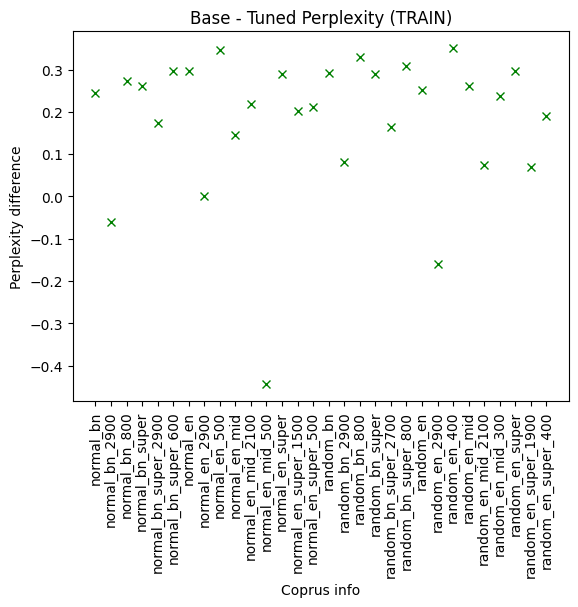

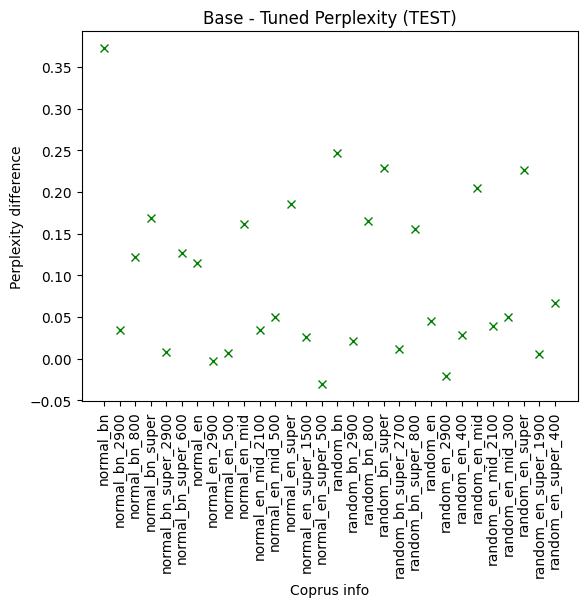

In [155]:
import matplotlib.pyplot as plt

def report_pp_plot(dct):
    def inner(x, y, labels, t):
        plt.plot(x, y, 'x', c = 'g')        
        plt.xticks(x, labels, rotation=90)
        plt.title(f"Base - Tuned Perplexity ({t})")
        plt.xlabel("Coprus info")
        plt.ylabel("Perplexity difference")
        plt.show()
        
    x_data = [i for i in range(len(dct))]
    y_train = []
    y_test = []
    for key in sorted(dct.keys()):
        y_train.append(dct[key][0])
        y_test.append(dct[key][1])
        
    labels = sorted(dct.keys())
    inner(x_data, y_train, labels, t = "TRAIN")
    inner(x_data, y_test, labels, t = "TEST")
    
report_pp_plot(report_pp)

In [ ]:
# TEST BLOCK (Model - 3)
#
# RNN-Training for Character level

train_test = [('train_s1', 'test_s1')]
corpus_types = ['normal', 'random']

for tup in train_test:
    for corpus_type in corpus_types:
        for corpus_name in info:
            train_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[0] + "/" + corpus_type + "/" + corpus_name[0] 
            test_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[1] + "/" + corpus_type + "/" + corpus_name[0]
            model_name = corpus_type + "_" + corpus_name[0].replace(".txt", "")
            vocab = corpus_name[1]
                    
            !/home/snlp-project-21/rnnlm/rnnlm \
              -train $train_path \
              -valid $test_path \
              -rnnlm /home/snlp-project-21/Downloads/Project/temp/rnn_model/$model_name \
                -hidden 80 \
                -rand-seed 1 \
                -debug 2 \
                -bptt 12 \
                -class $vocab

In [ ]:
# TEST BLOCK (Model - 3)
#
# Test block to find the right vocabulary numbers for all the cases
#
# RNN-Training for small and big vocabulary.


train_test = [('train_s2', 'test_s2'), ('train_s3', 'test_s3')]
corpus_types = ['normal', 'random']
corpus_names = ['en', 'en_mid', 'en_super', 'bn', 'bn_super']

for tup in train_test:
    for corpus_type in corpus_types:
        for corpus_name in corpus_names:
            if tup[0] == "train_s2":
                for s2 in range(100, 900, 100):
                    train_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[0] + "/" + corpus_type + "/" + corpus_name + "/" + corpus_name + "_" + str(s2) + ".txt"
                    test_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[1] + "/" + corpus_type + "/" + corpus_name + "/" + corpus_name + "_" + str(s2) + ".txt"
                    model_name = corpus_type + "_" + corpus_name + "_" + str(s2)
                    vocab = s2 - 2
                    
                    !/home/snlp-project-21/rnnlm/rnnlm \
                      -train $train_path \
                      -valid $test_path \
                      -rnnlm /home/snlp-project-21/Downloads/Project/temp/rnn_model/$model_name \
                        -hidden 80 \
                        -rand-seed 1 \
                        -debug 2 \
                        -bptt 12 \
                        -class $vocab
                    
            else:
                for s3 in range(1500, 3000, 200):
                    train_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[0] + "/" + corpus_type + "/" + corpus_name + "/" + corpus_name + "_" + str(s3) + ".txt"
                    test_path = "/home/snlp-project-21/Downloads/Project/segmented/" + tup[1] + "/" + corpus_type + "/" + corpus_name + "/" + corpus_name + "_" + str(s3) + ".txt"
                    model_name = corpus_type + "_" + corpus_name + "_" + str(s3)
                    vocab = s3 - 2
                    
                    !/home/snlp-project-21/rnnlm/rnnlm \
                      -train $train_path \
                      -valid $test_path \
                      -rnnlm /home/snlp-project-21/Downloads/Project/temp/rnn_model/$model_name \
                        -hidden 80 \
                        -rand-seed 1 \
                        -debug 2 \
                        -bptt 12 \
                        -class $vocab
                    

## **4 Text Generation (16 points)**

After training our language models, we are now ready to create some artificial data!

1. For every language model trained in 3, use rnnlm to generate $k = 10^1, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7$ output tokens. This means that you have to run rnnlm 7 times and change the parameter of the flag in every run. (8 points)

2. Inspect `100.txt` for every model. Do you see a difference in the quality of the generated data? Why could that be? <br/>
(Note: Your generated data will be in the form of subwords. You have to decode this back to word level to compare) (6 points)

## Our Approach
----

Let's go through files generated by our **Tuned** models -

**Basic Observation:** 
For **Task 2.3.1** models, there are less amount of generated tokens. Since it's in character level. Even, they doesn't make more senese. For exmaple, *normal_en* model generated data - 

```
SE you otherself slyouse, Ha greatule that is-I.
An as a know, and the Mock Toont she name to seeme
```
Few very commong words has been generated. Big words doesn't make sense or got meaning to it. And, also the same for *random_en* - 

```
.
Hecoose like this the croend your to pet my can a nang beant, lapter come let cirly org on not me
```

Let's check if our best preprocessing made some difference or not. *normal_en_super* output -

```
with them her every any no othen out off or like this thesetioution open uss have to aftered the da
```

*random_en_super* output - 

```
upon and she less was best and thet thought howeverstlel well
there pokelt in my too bopal and an 
```
Looking more or less the same, but may be we can encounter the common words frequency a but more.



For **Task 2.3.2** models, these texts make more sense than in character level model (**Task 2.3.1**). Also, we are observering meaningful output for words with larger length. *normal_en* output - 

```
said the Mock Turtle was all at all table to know you, noning to think, said T a bally lookedernly Fash about, they would chetho dry- The floom without been, said the reason a Queen, and said after a snying tailled little sigh.
But.
-ishes!
you see, then theyll remembers not out
```

Words like - **remembers**, **Turtle**, etc. are making more sense. Which was absent in character level models.


**Note:** It's a bit better for our preprocessed corpus output. Will not fill the cell with just corpus output. However, we will be able to prove it in the next **Task**.



For **Task 2.3.3** models, This model with larger vocabulary size is able to produce even larger meaningful words. And, is much better. *normal_en* output - 

```
said the Mock Turtle, we Yes, was always himself.
Wead tell before without look, twinkle!
said Alice indignantly, and manage nibbling about itser.
The Duchess players, quite waiting passed bats now shoulders like the Cheshire golden two, so she heardedth whispered.
-fle on a lobster again, thought Alice.
Thats the Mock Turtle.
The Cat little little sigh will WHAT after a sort of the wood.
you take help withl for that with
```

More complex, meaningful, and larger words are present - **indignantly**, **nibbling**, etc. And less meaningless words is present with this generation.


We can say - larger vocabulary size is helping.


**What about "Base Model" outputs?**

Here is an example: `normal_en` for **Task 2.3.3** vocabulary size - 

```
She was a p somewherethe as greatam off for a shrill, and heain replied, feeling to see that it a grin.
They am I think if it turned move such a along the marked took the stick, Very from anxiously to know me byill theER, we said advance a long chanc for one noseal though Dinah Shesography VERYbut, as just as well could not, what I fond, she Lory in a very many r difficulty, and enough to play them.
```

We can see, more *weirder* words. Even, some of the smaller words are without any meaning - **byill**, **chanc**, etc.. We will be able to check this more in the next Task.

**Conclusion?** - I think we are going towards the right direction?

In [ ]:
# Generating text for Base Model (3.1)

import os

files = os.listdir("/home/snlp-project-21/Downloads/Project/baseline_models/")
models = []

for file in files:
    if '.txt' not in file:
        models.append(file)

rnnpath= "/home/snlp-project-21/rnnlm/"
rnnmodel_path= "/home/snlp-project-21/Downloads/Project/baseline_models/"

for model in models:
    for i in range(1, 8):
        file_name = model + "_" + str(i) + ".txt"
        rnnmodel = rnnmodel_path + model
        text_number = 10 ** i
        
        !$rnnpath/rnnlm \
            -rnnlm $rnnmodel \
            -gen $text_number \
            -debug 0 \
            > /home/snlp-project-21/Downloads/Project/baseline_files/$file_name

In [ ]:
# Generating text for Tuned Model (3.2)

import os

files = os.listdir("/home/snlp-project-21/Downloads/Project/final_models/")
models = []

for file in files:
    if '.txt' not in file:
        models.append(file)

rnnpath= "/home/snlp-project-21/rnnlm/"
rnnmodel_path= "/home/snlp-project-21/Downloads/Project/final_models/"

for model in models:
    for i in range(1, 8):
        file_name = model + "_" + str(i) + ".txt"
        rnnmodel = rnnmodel_path + model
        text_number = 10 ** i
        
        !$rnnpath/rnnlm \
            -rnnlm $rnnmodel \
            -gen $text_number \
            -debug 0 \
            > /home/snlp-project-21/Downloads/Project/final_model_files/$file_name

## **5 OOV comparison (16 points)**

1. Using the original corpora generated in 1., find the train and test vocabulary and determine the OOV rate at word level. (2 points)

2. Use the generated corpora from **4.** to augment the train vocabulary. Do this $k$ times, i. e. for generated corpora of size $10^1, 10^2,...,10^7$. For each model and each $k$, calculate the OOV rate of the augmented train set against the test set. (8 points)

3. For each model, plot OOV rates. What do you observe? Which of the models would you use in a practical application? (6 points)

## Our Approach
----

Please see the *markdown* cells and some *code cell* with outputs below -

In [12]:
# Task 5.1 
# Calculating OOV for Original Corpus

def vocabulary_builder(file_path):
    vocab = {}
    with open(file_path, 'r') as file:
        corpus = file.read()
        corpus = corpus.replace('\n', ' ')
        cropus = corpus.split(' ')
        
        for word in cropus:
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1
    
    return vocab



import os 
files = os.listdir("/home/snlp-project-21/Downloads/Project/data/train/")
corpus_types = ['r_train', 'train']

original_corpus_info = {}
baseline_oov_rates = {}
for corpus_type in corpus_types:
    for file in files:
        if corpus_type == "r_train":
            train_file = "/home/snlp-project-21/Downloads/Project/data/" + corpus_type + "/" + file
            test_file = "/home/snlp-project-21/Downloads/Project/data/" + "r_test" + "/" + file
            
            train_vocab = vocabulary_builder(train_file)
            test_vocab = vocabulary_builder(test_file)
            
            oovs = list(set(test_vocab.keys()) - set(train_vocab.keys()))
            
            total_count = 0
            for word in oovs:
                total_count += test_vocab[word]
            baseline_oov_rates["random_" + file.replace('.txt', '')] = round((total_count/sum(test_vocab.values())) * 100, 3)
            
        else:
            train_file = "/home/snlp-project-21/Downloads/Project/data/" + corpus_type + "/" + file
            test_file = "/home/snlp-project-21/Downloads/Project/data/" + "test" + "/" + file
            
            train_vocab = vocabulary_builder(train_file)
            test_vocab = vocabulary_builder(test_file)
            
            oovs = list(set(test_vocab.keys()) - set(train_vocab.keys()))
            
            total_count = 0
            for word in oovs:
                total_count += test_vocab[word]
            baseline_oov_rates["normal_" + file.replace('.txt', '')] = round((total_count/sum(test_vocab.values())) * 100, 3)

In [30]:
# Decoding files for both baseline and Tuned model

import os
import sentencepiece as spm

def decoder_func(model, file, file_location):
    model_loader = spm.SentencePieceProcessor()
    model_loader.load(model)

    lines = []
    with open(file, 'r') as file:
        for line in file:
            lines.append(line)

    original = []
    with open(file_location, 'w') as file:
        for line in lines:
            file.write(model_loader.decode_pieces(line.split(' ')))

types = ['baseline_files', 'final_model_files']
for typ in types:
    generated_files = os.listdir("/home/snlp-project-21/Downloads/Project/" + typ + "/")
    
    for generated_file in generated_files:
        lst = generated_file.split("_")
        direction = lst[:-1]
        
        if direction[-1].isdigit():
            if int(direction[-1]) >= 1500:
                train_folder = "train_s3"
                model_path = "/home/snlp-project-21/Downloads/Project/model/" + \
                            train_folder + "/" + direction[0] + "/" + "_".join(direction[1:]) + ".model"
                
                generated_file_location = "/home/snlp-project-21/Downloads/Project/" + typ + "/" + generated_file
                save_location = "/home/snlp-project-21/Downloads/Project/" + typ + "_decoded" + "/" + generated_file
                decoder_func(model_path, generated_file_location, save_location)
            else:
                train_folder = "train_s2"
                model_path = "/home/snlp-project-21/Downloads/Project/model/" + \
                            train_folder + "/" + direction[0] + "/" + "_".join(direction[1:]) + ".model"
                generated_file_location = "/home/snlp-project-21/Downloads/Project/" + typ + "/" + generated_file
                save_location = "/home/snlp-project-21/Downloads/Project/" + typ + "_decoded" + "/" + generated_file
                decoder_func(model_path, generated_file_location, save_location)
                
        else:
            train_folder = "train_s1"
            model_path = "/home/snlp-project-21/Downloads/Project/model/" + \
                            train_folder + "/" + direction[0] + "/" + "_".join(direction[1:]) + ".model"
            generated_file_location = "/home/snlp-project-21/Downloads/Project/" + typ + "/" + generated_file
            save_location = "/home/snlp-project-21/Downloads/Project/" + typ + "_decoded" + "/" + generated_file
            decoder_func(model_path, generated_file_location, save_location)

In [18]:
# TEST BLOCK (For Model 3.3)
#
# This code block is to decode all the generated files
#
# I have changed the path scheme


import sentencepiece as spm
import os


def decoder_func(model, file, file_location):
    model_loader = spm.SentencePieceProcessor()
    model_loader.load(model)

    lines = []
    with open(file, 'r') as file:
        for line in file:
            lines.append(line)

    original = []
    with open(file_location, 'w') as file:
        for line in lines:
            file.write(model_loader.decode_pieces(line.split(' ')))

model_types = ['train_s1', 'train_s2', 'train_s3']
corpus_types = ['random', 'normal']
model_names = ['en', 'en_mid', 'en_super', 'bn', 'bn_super']

for model_name in model_names:
    for model_type in model_types:
        for corpus_type in corpus_types:
            if model_type == "train_s1":
                model_location = "/home/snlp-project-21/Downloads/Project/model/" + model_type + "/" + corpus_type + "/" + model_name + ".model"
                for i in range(1, 8):
                    generated_file = "/home/snlp-project-21/Downloads/Project/temp/generated_text/" + corpus_type + "_" + model_name + "_" + str(i) + ".txt"
                    file_location = "/home/snlp-project-21/Downloads/Project/temp/generated_ori/" + corpus_type + "_" + model_name + "_" + str(i) + ".txt"
                    
                    decoder_func(model_location, generated_file, file_location)
                
            elif model_type == "train_s2":
                for s2 in range(100, 900, 100):
                    model_location = "/home/snlp-project-21/Downloads/Project/model/" + model_type + "/" + corpus_type + "/" + model_name + "_" + str(s2) + ".model"
                    for i in range(1, 8):
                        generated_file = "/home/snlp-project-21/Downloads/Project/temp/generated_text/" + corpus_type + "_" + model_name + "_" + str(s2) + "_" + str(i) + ".txt"
                        file_location = "/home/snlp-project-21/Downloads/Project/temp/generated_ori/" + corpus_type + "_" + model_name + "_" + str(s2) + "_" + str(i) + ".txt"
                        
                        decoder_func(model_location, generated_file, file_location)
                        
            
            else:
                for s3 in range(1500, 3000, 200):
                    model_location = "/home/snlp-project-21/Downloads/Project/model/" + model_type + "/" + corpus_type + "/" + model_name + "_" + str(s3) + ".model"
                    for i in range(1, 8):
                        generated_file = "/home/snlp-project-21/Downloads/Project/temp/generated_text/" + corpus_type + "_" + model_name + "_" + str(s3) + "_" + str(i) + ".txt"
                        file_location = "/home/snlp-project-21/Downloads/Project/temp/generated_ori/" + corpus_type + "_" + model_name + "_" + str(s3) + "_" + str(i) + ".txt"
                        
                        decoder_func(model_location, generated_file, file_location)

In [47]:
# Building OOV Rates for Tuned model (OR, any model)

import os
from tqdm import tqdm

def vocabulary_builder(file_path):
    vocab = {}
    with open(file_path, 'r') as file:
        corpus = file.read()
        corpus = corpus.replace('\n', ' ')
        cropus = corpus.split(' ')
        
        for word in cropus:
            if word not in vocab:
                vocab[word] = 0
            vocab[word] += 1
    
    return vocab

def common_task(train_file_name, decoded_files_directory, file):
    train_file_location = "/home/snlp-project-21/Downloads/Project/data/train/"
    test_file_location = "/home/snlp-project-21/Downloads/Project/data/test/"
    
    train_file_path = train_file_location + train_file_name
    test_file_path = test_file_location + train_file_name
    decoded_file_path = decoded_files_directory + file

    train_vocab = vocabulary_builder(train_file_path)
    test_vocab = vocabulary_builder(test_file_path)
    decoded_vocab = vocabulary_builder(decoded_file_path)
    
    main_vocab = {**train_vocab, **decoded_vocab}            
    oovs = list(set(test_vocab.keys()) - set(main_vocab.keys()))

    total_count = 0
    for word in oovs:
        total_count += test_vocab[word]
    return round((total_count/sum(test_vocab.values())) * 100, 3)

def OOV_calculation(decoded_files_directory):
    decoded_files = os.listdir(decoded_files_directory)

    info_gain_oov = {}
    for file in tqdm(decoded_files):
        naming_s = file[:-6].split("_")


        if naming_s[-1].isdigit():
            if naming_s[0] == 'normal':
                train_file_name = '_'.join(naming_s[1:-1]) + '.txt'
                info_gain_oov[file] = common_task(train_file_name, decoded_files_directory, file)

            else:
                train_file_name = '_'.join(naming_s[1:-1]) + '.txt'
                info_gain_oov[file] = common_task(train_file_name, decoded_files_directory, file)

        else:
            if naming_s[0] == 'normal':
                train_file_name = '_'.join(naming_s[1:]) + '.txt'
                info_gain_oov[file] = common_task(train_file_name, decoded_files_directory, file)

            else:
                train_file_name = '_'.join(naming_s[1:]) + '.txt'
                info_gain_oov[file] = common_task(train_file_name, decoded_files_directory, file)
    return info_gain_oov

# A report for visualization
def corpus_information(original_dct):
    corpus_info = {}
    for item in sorted(original_dct.keys()):
        iteme = item.split("_")
        corpora = "_".join(iteme[:-1])
        if corpora not in corpus_info:
            corpus_info[corpora] = {}
        corpus_info[corpora][str(iteme[-1].split(".")[0])] = original_dct[item]
    
    return corpus_info

In [48]:
tuned_corpus_info = corpus_information(OOV_calculation("/home/snlp-project-21/Downloads/Project/final_model_files_decoded/"))

100%|██████████| 210/210 [01:00<00:00,  3.48it/s]


In [49]:
baseline_corpus_info = corpus_information(OOV_calculation("/home/snlp-project-21/Downloads/Project/baseline_files_decoded/"))

100%|██████████| 210/210 [01:01<00:00,  3.41it/s]


In [50]:
compare = corpus_information(OOV_calculation("/home/snlp-project-21/Downloads/Project/temp/generated_ori/"))

100%|██████████| 1190/1190 [06:35<00:00,  3.01it/s]


### #Observation 5.1 & 5.2
---

**Task 5.1** - For different preprocessing level, the `Original` column denotes the **Task 1** OOV rates. <br>
**Task 5.2** - For all the generated files in **Task 4** ($K = 1, 2, ... , 7$, in rows), for three kind of models described in **Task 3**, corresponding column shows the OOV rates.

In [180]:
# Task 5.2
# OOV rates for all models and k = 1, 2, ... , 7
import re

plot_data = {}
for key in baseline_corpus_info:
    corpus_new = re.sub('[\d]+', '', key).rstrip("_")
    other_info = key[len(corpus_new)+1:]
    if other_info != "":
        if int(other_info) >= 1500:
            other_info = "Large Vocabulary (Task 2.3)"
        elif int(other_info) >= 400:
            other_info = "Smaller Vocabulary (Task 2.2)"
    else:
        other_info = "Character Level (Task 2.1)"
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"Corpus: {corpus_new}\t\t| {other_info}")
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print(f"\t Tuned\t\t Base\t\t Old\t\t Original")
    bl = re.sub("[\d]+", "" , key)
    bl_key = bl.rstrip("_")
    
    if key not in plot_data:
        plot_data[key] = {}
        
    for k in compare[key]:
        if int(k) == 1:
            print(f"k = {k} {tuned_corpus_info[key][k]:>9}% {baseline_corpus_info[key][k]:14}% {compare[key][k]:14}% {baseline_oov_rates[bl_key]:14}%")
        else:
            print(f"k = {k} {tuned_corpus_info[key][k]:>9}% {baseline_corpus_info[key][k]:14}% {compare[key][k]:14}%")
        
        plot_data[key][k] = (tuned_corpus_info[key][k], baseline_corpus_info[key][k], \
                             compare[key][k], baseline_oov_rates[bl_key])
    print("\n\n")

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Corpus: normal_bn		| Character Level (Task 2.1)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	 Tuned		 Base		 Old		 Original
k = 1    14.134%         14.134%         14.134%         14.134%
k = 2    14.134%         14.134%         14.134%
k = 3    14.134%         14.132%         14.134%
k = 4    14.113%         14.117%         14.107%
k = 5    13.995%         13.997%         13.927%
k = 6    13.302%         13.505%         13.221%
k = 7    11.894%         12.354%          11.82%



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Corpus: normal_bn		| Large Vocabulary (Task 2.3)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
	 Tuned		 Base		 Old		 Original
k = 1    14.134%         14.134%         14.134%         14.134%
k = 2    14.132%         14.134%         14.134%
k = 3     14.13%         14.132%         14.134%
k = 4     14.07%         14.08

### #Observation 5.3

### #OOV Rate Observation
---

*WE WILL ONLY REPORT on $10^7$ tokens generation in this block. Since, it will be more efficient to report on that rather than going through all of $k$ values. More or less, the trend is same.*


First, we will start from **Task 1**. (**Task 2.3** is also described in it.)<br>
#### NORMAL VS RANDOM 
---
**Did shuffling lines from the raw corpus helped?**<br>

**Facts**: <br>
**BENGALI CORPUS** -

*These improvements/report are compared on **Tuned Model**. Basically, that is our submitted model on **Task 3**. However, the **Old Model** performance is even better. But, that goes against the requirements on **Task 3**.*

1. **It didn't help in case of Bengali corpus with very Mild preprocessing**: The OOV rates were higher in all the models for corpus with shuffled lines. The OOV rate worsen by 0.4% - 0.7% (variations are observed considering **TASK 2**)

2. **It even didn't help much in case of Super Level preprocessing**: The OOV rate remained almost the same or a little bit better by 0.1%. Which, we can ignore (maybe).


**ENGLISH CORPUS** -
1. **It did it's magic in Mild Level preprocessing**: The improvement in OOV rates were somewhere from 2.7%, 3.33%, and 3.7% (in **Task 2.3** perspective). That is amazing, considering how much we got improvement just by shuffling sentences.

2. **Same trend in Mid Level preprocessing too**: The improvements were 2.66%, 2.98% and 3% respectively for **Task 2.3** character level, smaller vocabulary level, and larger vocabulary level (reported above as stated by task 2, too). 

3. **Much imporovement in Super Level preprocessing**: OOV rate improvements in 3.68% , 3%, and 3%. We can see a different trend. That the character level model is performing better with 3.68% OOV rate improvements. 



**Conclusion**: We have thought, since `Bengali Corpus` got biased data, shuffling lines will help in our case. 
However, it helped more in the `English Corpus` than in Bengali, in case of OOV rate. 


#### What did we pick? (Which preprocessing and models..)
---
##### # Models
---
For `Bengali Corpus` we will talk about data without shuffling. Meaning, `Normal Models` outputs. <br>
For `English Corpus`, it `Random Models`.

##### # Preprocessing
---
**BENGALI CORPUS** - <br>
By looking at our **Tuned Model** OOV rates, the table shows which typer of preprocessing got lower OOV rates with a "&check;" mark.

| Task  | Mild Level | Super Level | Lowest OOV Rate |
|---|---|---|---|
| 2.3.1 |            | &check;     | 10.938 |
| 2.3.2 |            | &check;     | 10.052 |
| 2.3.3 |            | &check;     | 9.711  |

So we are picking **Super Level** preprocessing for `Bengali Corpus` and will only talk about it in the `Final Report`.


**ENGLISH CORPUS** - <br>

| Task  | Mild Level | Mid Level | Super Level | Lowest OOV Rate |
|-------|------------|-----------|-------------|-----------------|
| 2.3.1 |            |           | &check;      | 7.031           |
| 2.3.2 |            |           | &check;      | 5.859           |
| 2.3.3 |            |           | &check;      | 6.328           |

So we are picking **Super Level** preprocessing for `English Corpus` and will only talk about it in the `Final Report`.


#### Improvements over Base & Original (baseline)
---
**BENGALI CORPUS** -
Here, we will choose `Normal Corpus` (corpus without shuffling lines) and `Super Level` preprocessing (because, this is the lowest one). 

<u>Note: If interested, the difference is given in the output for all models below. </u>

The OOV rate for `Original Corpus` (with `Super Level` preprocessing and `Normal Corpus`) is $13.078$%

||Vs.|Improvements|Tuned OOV Rate
|---|---|---|---|
|Task 2.3.1|Original - Tuned|	2.14%|10.938%|
||Base - Tuned	|	0.25%| |
|Task 2.3.2|Original - Tuned|	3.03%|10.052%|
||Base - Tuned:	|	0.19%| |
|Task 2.3.3|Original - Tuned|	3.37%|9.711%|
||Base - Tuned:	|	0.05%| |
    
We can see, we have got around 2% to 3.4% OOV rate improvements with our `Tuned Model` on the original corpus with preprocessing.

**ENGLISH CORPUS** -
Here, we will choose `Random Corpus` (corpus without shuffling lines) and `Super Level` preprocessing (because, this is the lowest one). 

The OOV rate for `Original Corpus` (with `Super Level` preprocessing and `Random Corpus`) is $4.85$%

||Vs.|Improvements|Tuned OOV Rate|
|---|---|---|---|
|Task 2.3.1|Original - Tuned|	1.49%	|3.359%	|
||Base - Tuned	|	0.02%| |
|Task 2.3.2|Original - Tuned|	1.87%|2.982%	|
||Base - Tuned:	|	-0.04%| |
|Task 2.3.3|Original - Tuned|	1.49%|3.359%	|
||Base - Tuned:	|	0.06%| |

We can see, we have got around 1.49% to 1.87% OOV rate improvements with our `Tuned Model` on the original corpus with preprocessing.


#### Very Important Segement (about Task 1)
----
**How Much did our preprocessing itself helped to tackle OOV rate?**

Let's say, we don't want to compare it to the raw corpus (without preprocessing). But, we will compare our picked `Super Level` preprocessing the worst preprocessing `Mild Level` to gain an insight that how much we have improved on OOV rate. 

| Corpus Name | Mild (Baseline)| Super (Picked)| Improvement |
|---|---|---|---|
| Bengali (Normal) | 14.134% | 13.078% | 1.056% |
| English (Random) | 11.266% | 4.85%   | 6.416% |

**Yes!** We improved around $1$% for `Bengali` and $6.4$% for `English` just by our preprocessing (comparing against our worst preprocessing).

# TODO- Which model to choose for which application?
---

In [191]:
# OOV rate for 10^7 text generation of each Corpus/Models (Best case Data)

import re

with open('plot_data.txt', 'r') as file:
    data = file.read()
    dct = json.loads(data)
    random = []
    normal = []
    for key in dct:
        if "random" in key:
            random.append((key, dct[key]["7"]))
        else:
            normal.append((key, dct[key]["7"]))
        
    for item in range(len(random)):
        corpus = random[item][0].replace('random_', '')
        corpus_new = re.sub('[\d]+', '', corpus).rstrip("_")
        other_info = corpus[len(corpus_new)+1:]
        if other_info != "":
            if int(other_info) >= 1500:
                other_info = "Large Vocabulary (Task 2.3)"
            elif int(other_info) >= 100:
                other_info = "Smaller Vocabulary (Task 2.2)"
        else:
            other_info = "Character Level (Task 2.1)"
            
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print(f"Corpus: {corpus_new} \t\t\t| {other_info}")
        print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
        print("Random\t\t\t\t\tNormal")
        print("--------------------------------------------------------------------------")
        print(f"Tuned\t Base\t Old\t Original\tTuned\t Base\t Old\t Original")
        print(f"{random[item][1][0]}\t {random[item][1][1]}\t {random[item][1][2]}\t {random[item][1][3]}\t\t{normal[item][1][0]}\t {normal[item][1][1]}\t {normal[item][1][2]}\t {normal[item][1][3]}")
        print("--------------------------------------------------------------------------")
        print("Improvements: ")
        print(f"Original - Tuned:\t{round(random[item][1][3] - random[item][1][0], 2)}%\t\t{round(normal[item][1][3] - normal[item][1][0], 2)}%")
        print(f"Base - Tuned:\t\t{round(random[item][1][1] - random[item][1][0], 2)}%\t\t{round(normal[item][1][1] - normal[item][1][0], 2)}%")
        print("\n\n")
        

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Corpus: bn 			| Character Level (Task 2.1)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random					Normal
--------------------------------------------------------------------------
Tuned	 Base	 Old	 Original	Tuned	 Base	 Old	 Original
12.312	 12.536	 12.327	 14.653		11.894	 12.354	 11.82	 14.134
--------------------------------------------------------------------------
Improvements: 
Original - Tuned:	2.34%		2.24%
Base - Tuned:		0.22%		0.46%



++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Corpus: bn 			| Large Vocabulary (Task 2.3)
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Random					Normal
--------------------------------------------------------------------------
Tuned	 Base	 Old	 Original	Tuned	 Base	 Old	 Original
10.764	 10.814	 10.814	 14.653		10.379	 10.381	 10.458	 14.134
------------------------------------------

In [18]:
# Writing report for future use

import json

with open('plot_data.txt', 'w') as file:
    file.write(json.dumps(plot_data))

In [173]:
# Plotting OOV Rates for better visualization

import matplotlib.pyplot as plt

def report_oov_plot(dct, corpus_name):
    def inner(x, y):
        color = ['g', 'r', 'b', 'black']
        labels = ['Tuned', 'Base', 'Old', 'Original']
        corpus_names = corpus_name.split("_")
        if corpus_names[-1].isdigit():
            if int(corpus_names[-1]) >= 1500:
                corpus_names[-1] = f"   |   Large Vocabulary (Task 2.3)"
                
            else:
                corpus_names[-1] = f"   |   Small Vocabulary (Task 2.2)"
            corpus_names = "_".join(corpus_names[:-1]) + corpus_names[-1]
            
        else:
            corpus_names = "_".join(corpus_names) + f"   |   Character Level (Task 2.1)"
                    
        plot_data = [[] for i in range(len(color))]
        x_datas = []
        for xs in x:
            for i in range(len(color)):
                plot_data[i].append(y[xs][i])
            x_datas.append(f"$10^{xs}$")
        
        for i in range(len(plot_data)):
            plt.plot(x_datas, plot_data[i], '-*', c = color[i], label = labels[i])    
            
        plt.rcParams["figure.figsize"] = (12,4)
        plt.title(f"Corpus: {corpus_names}")
        plt.legend(loc="lower left")
        plt.xlabel("Generated Token Length")
        plt.ylabel("OOV Rate in %")
        plt.show()
        
    x_data = dct.keys()
    inner(x_data, dct)

### #Observation 5.3 (Plots)
---

The below block shows only the chosen chosen models and preprocessing corpus plots. **Later block** is for all the trained models (for **Task 5.1** and **Task 5.2**)

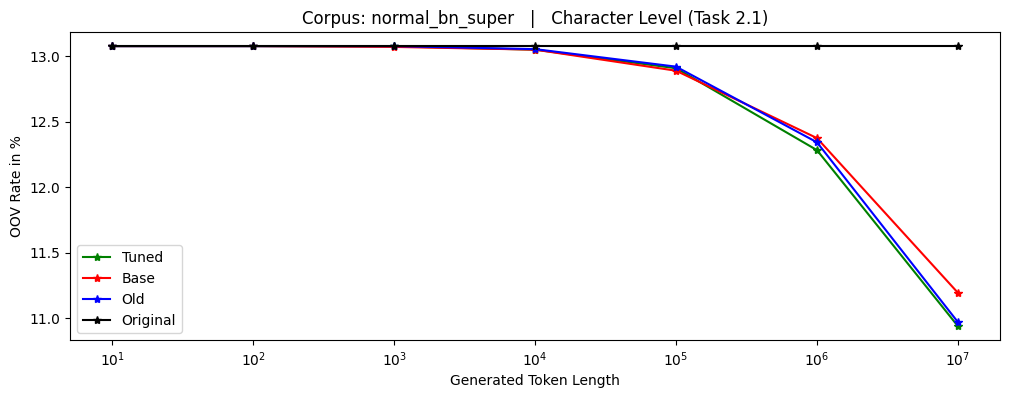

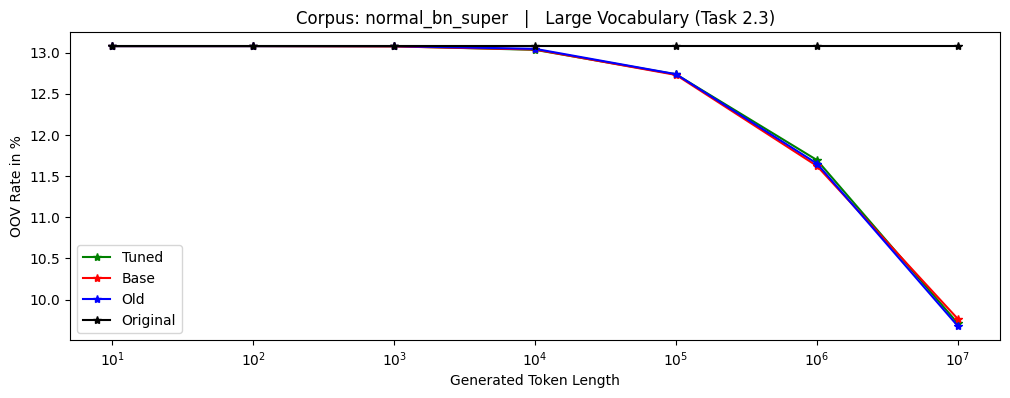

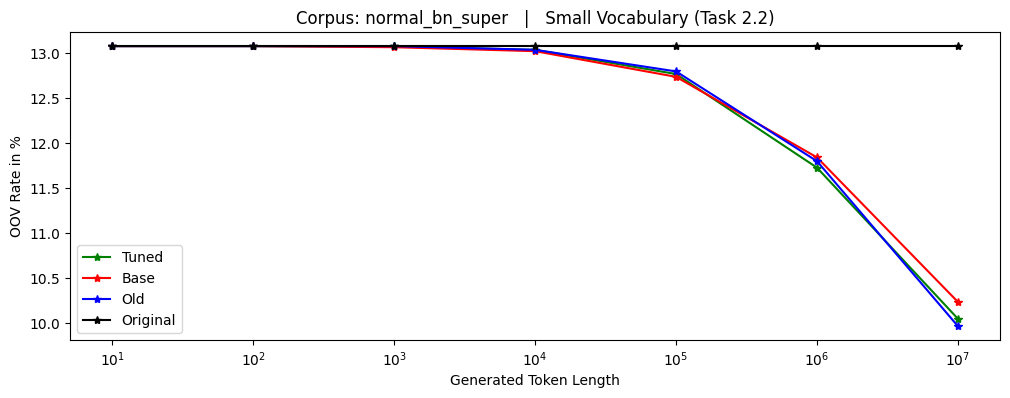

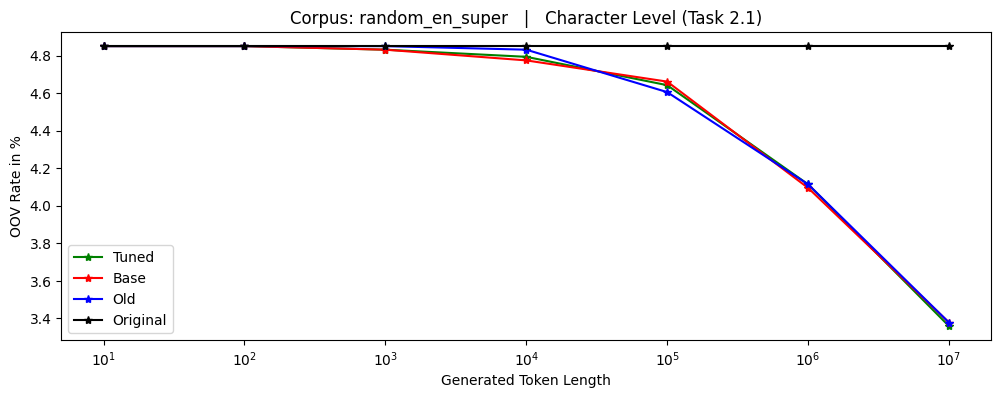

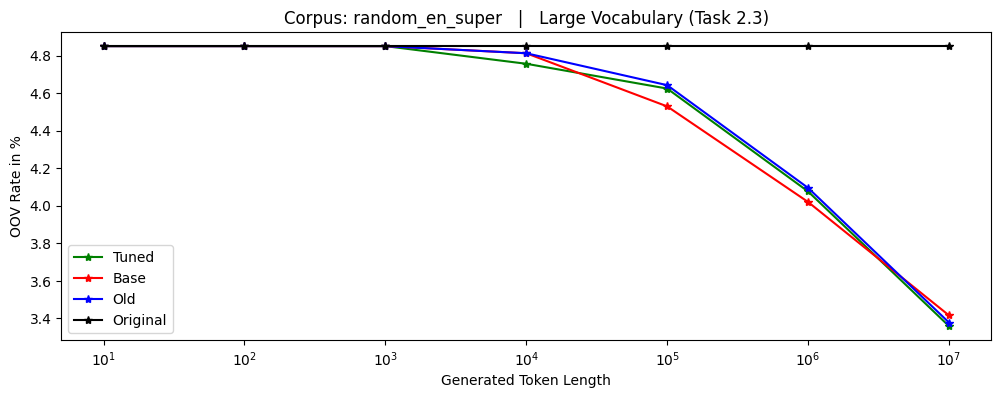

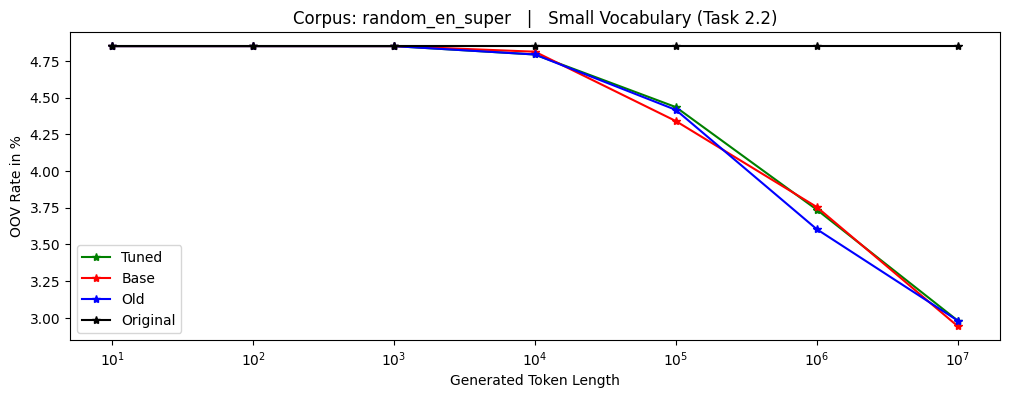

In [192]:
# Plotting OOV Rate for each corpus and Models

with open('plot_data.txt', 'r') as file:
    data = file.read()
    dct = json.loads(data)
    for key in dct:
        if "normal_bn_super" in key or "random_en_super" in key:
            report_oov_plot(dct[key], key)
    

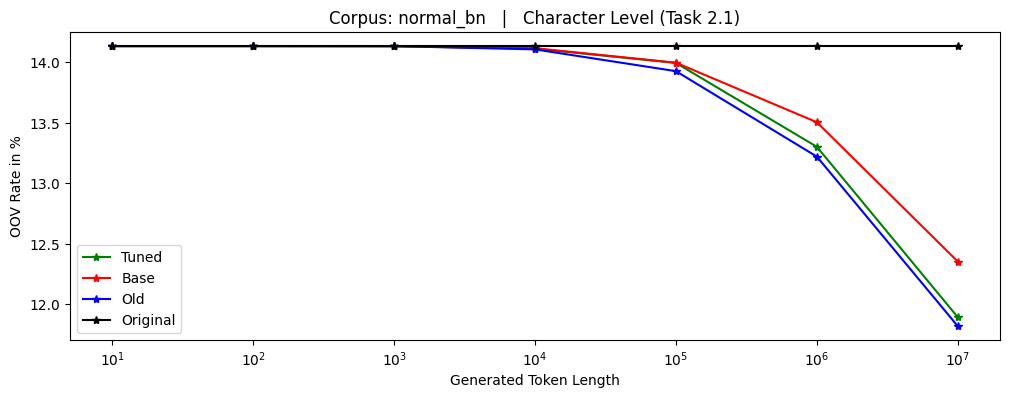

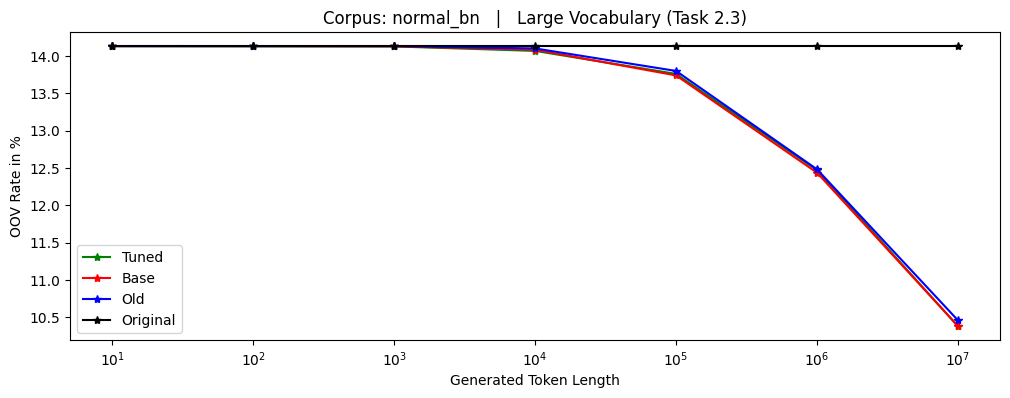

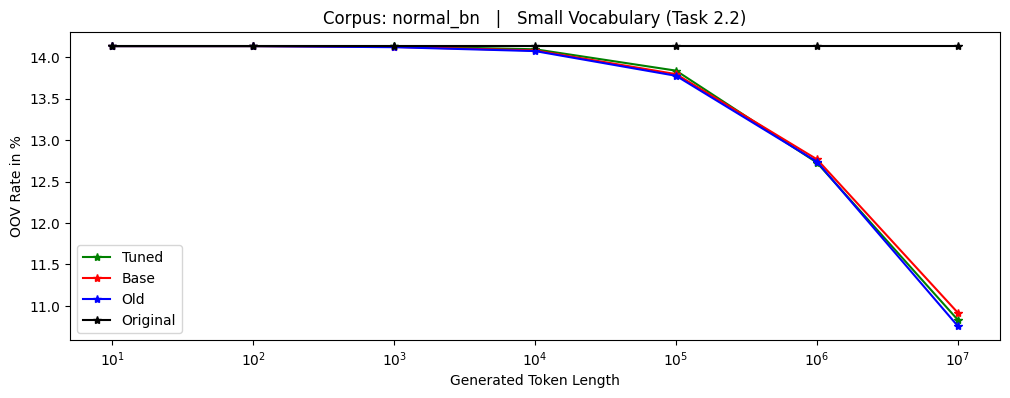

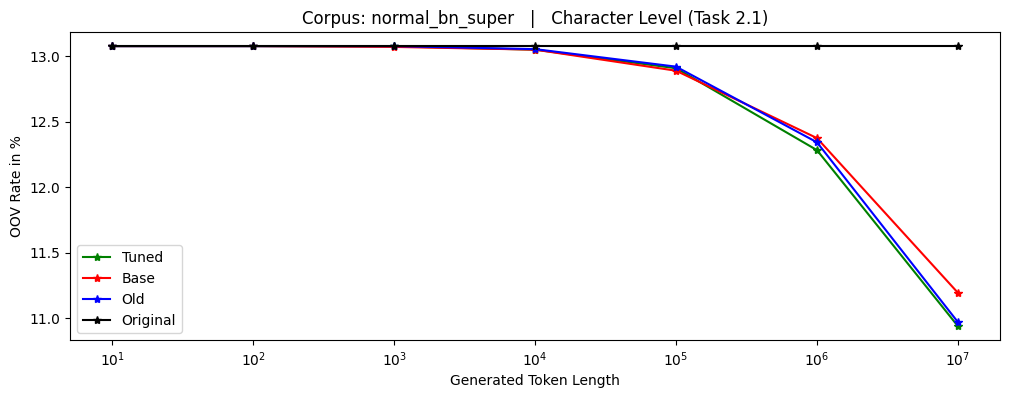

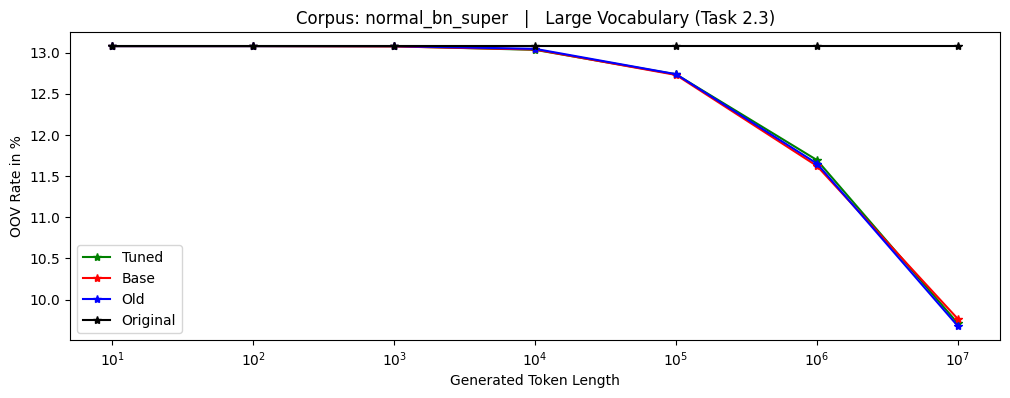

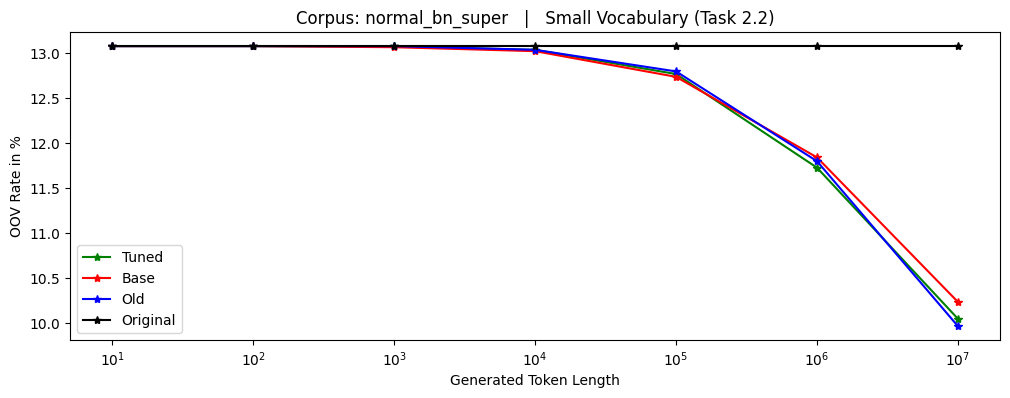

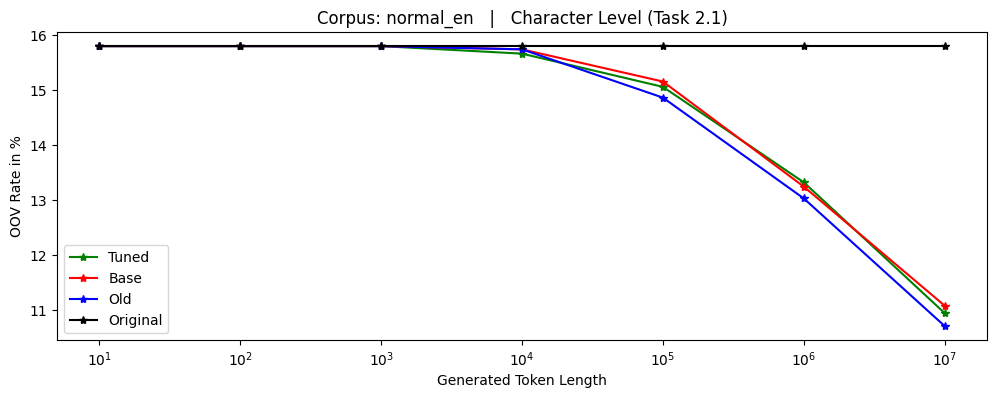

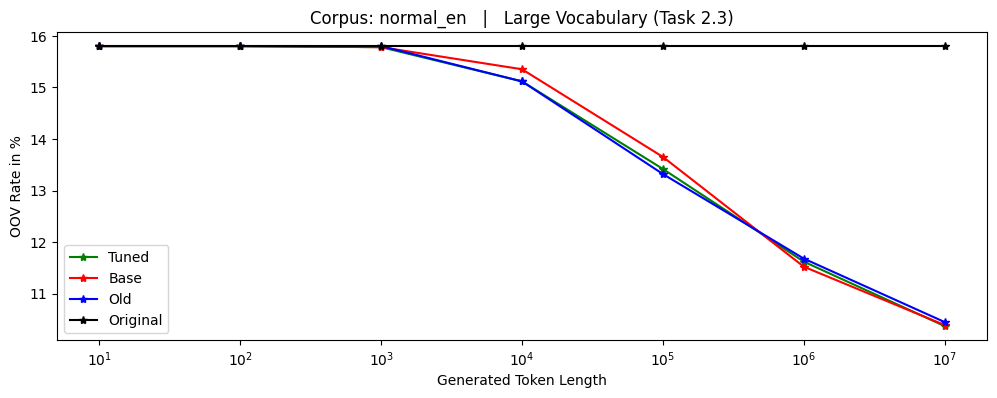

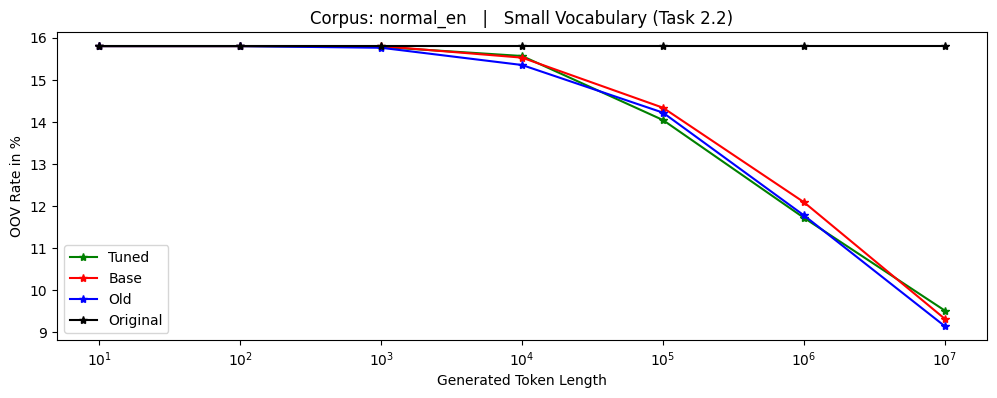

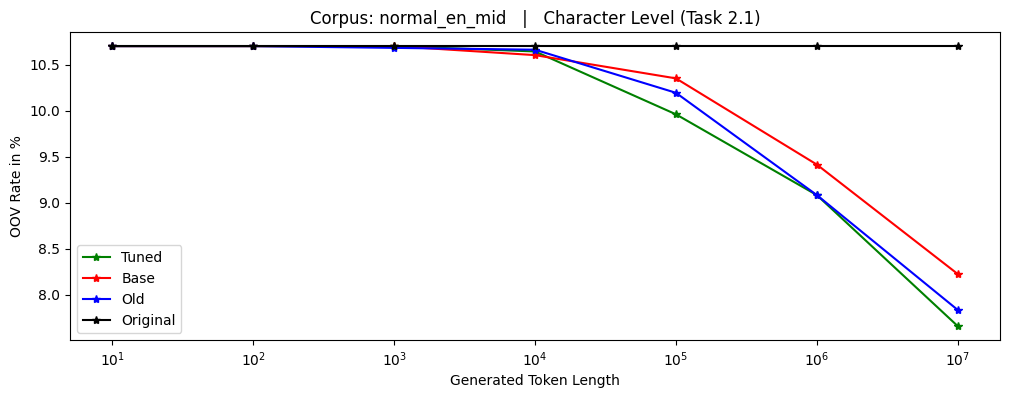

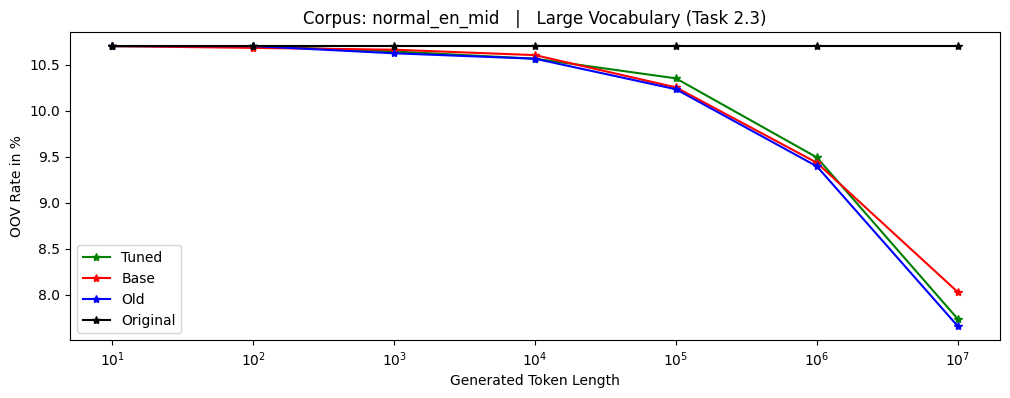

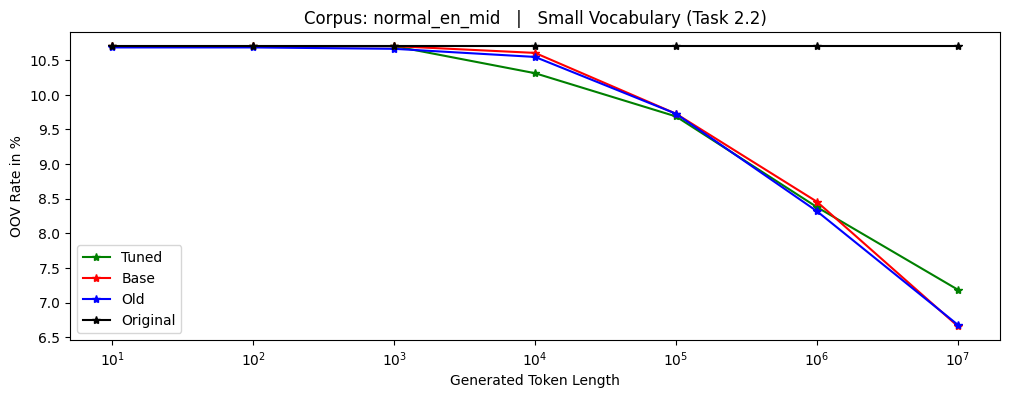

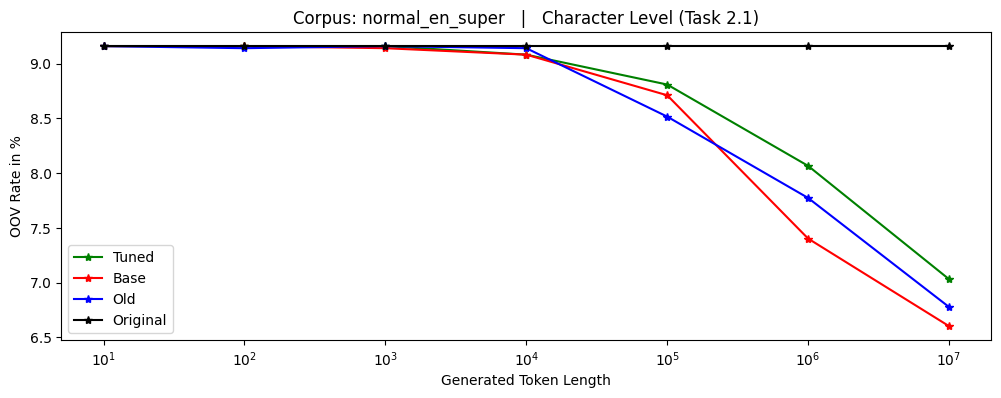

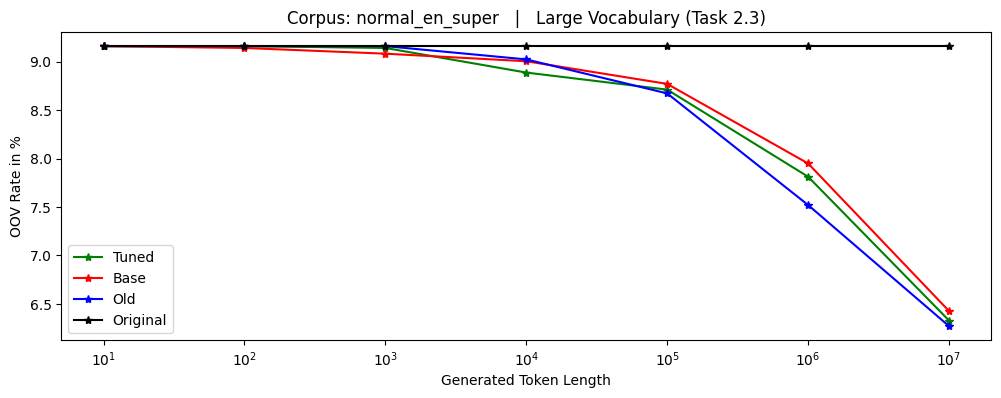

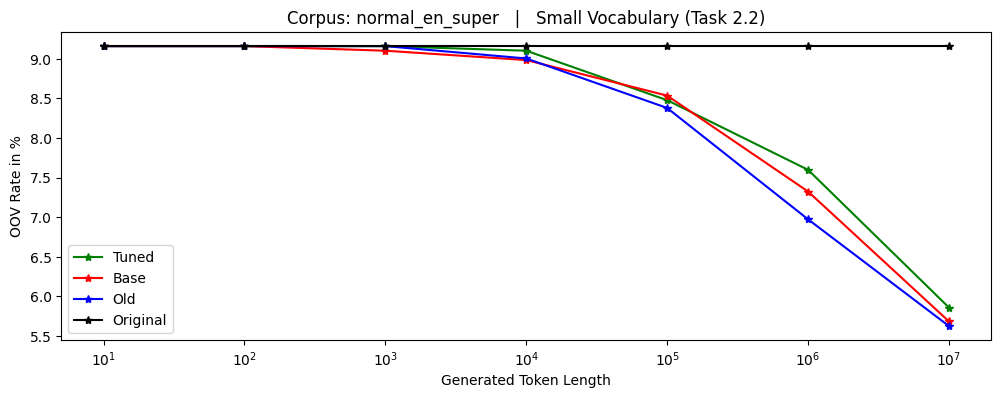

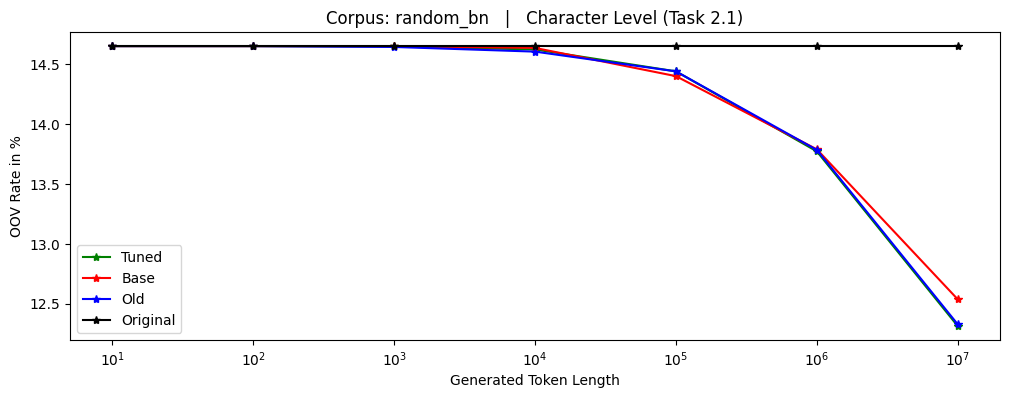

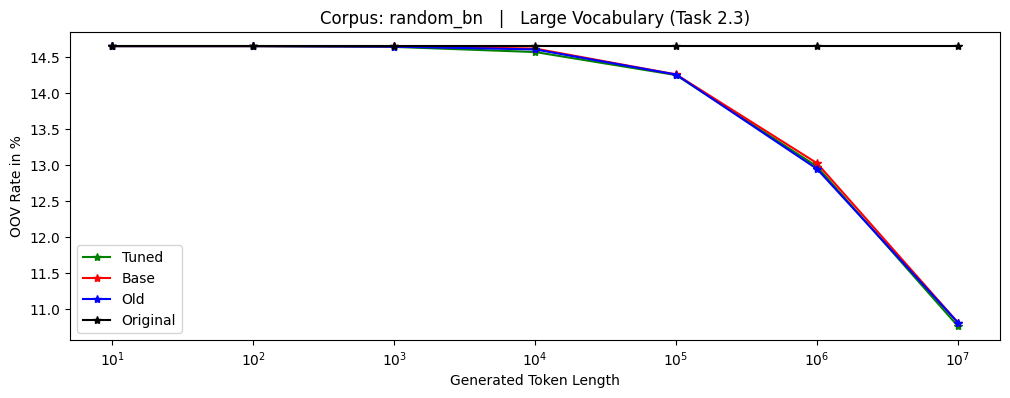

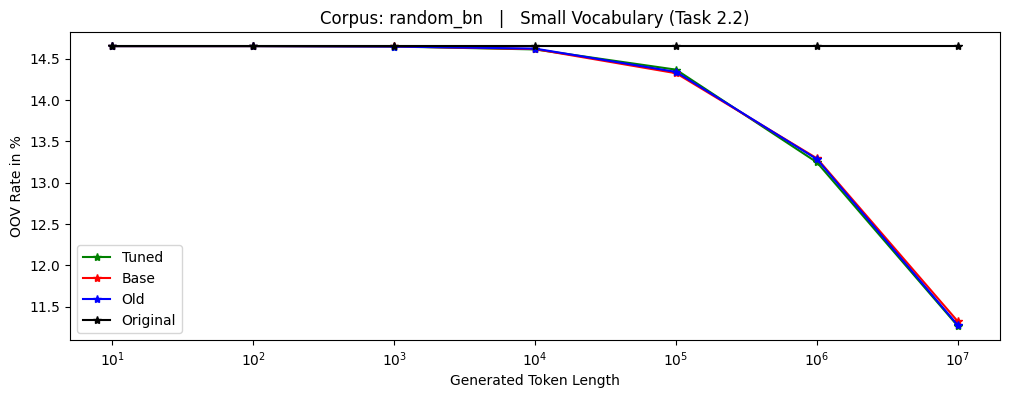

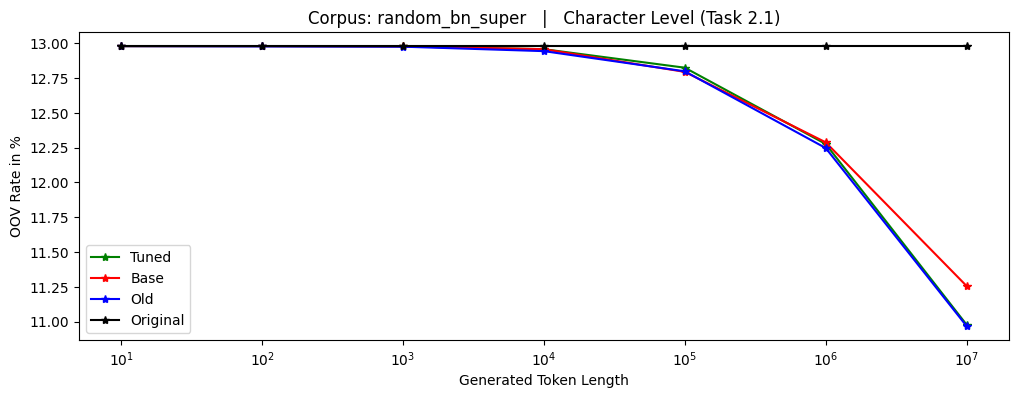

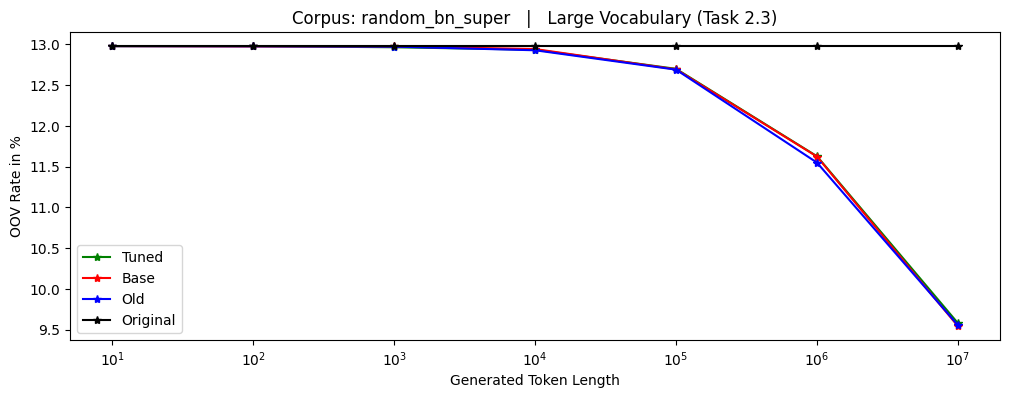

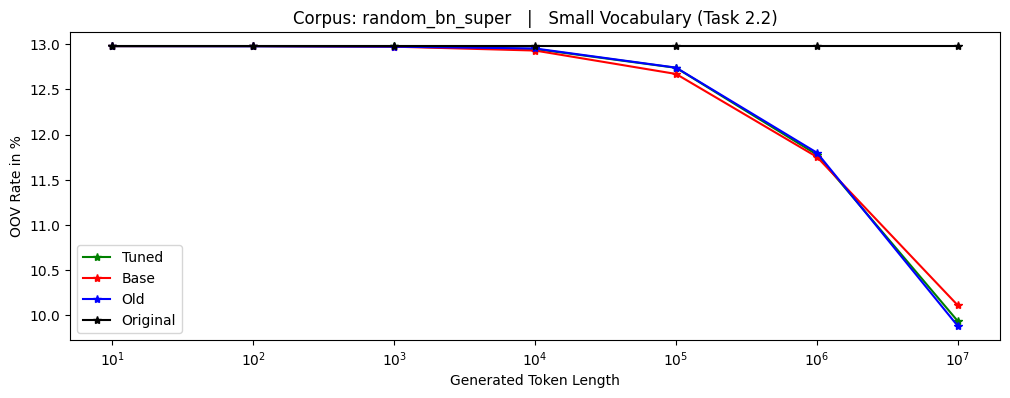

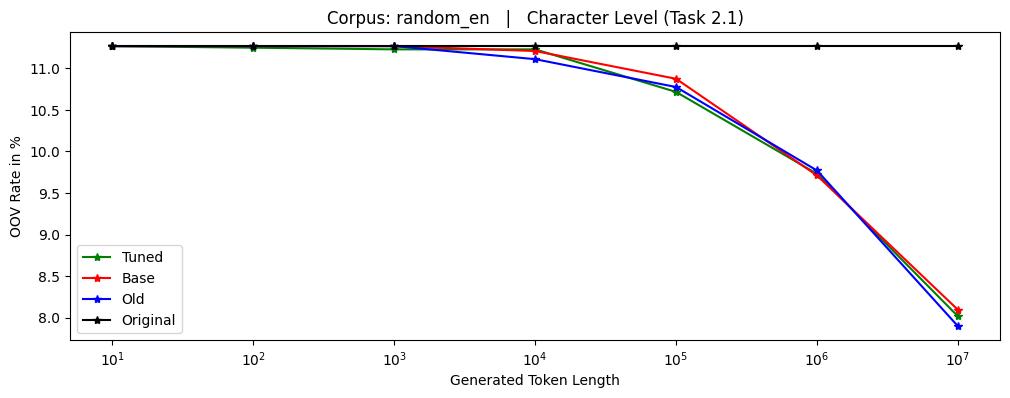

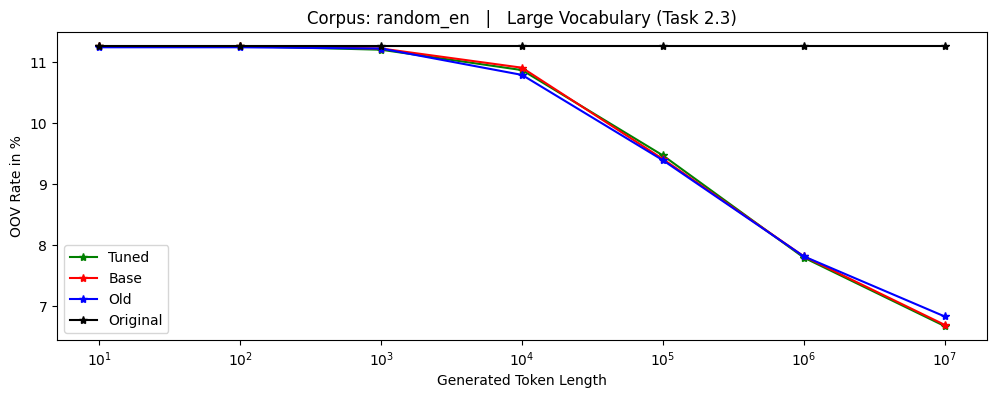

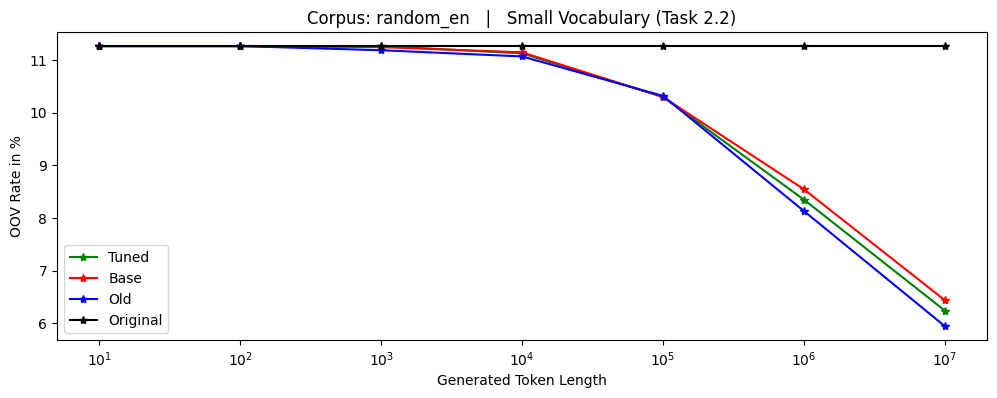

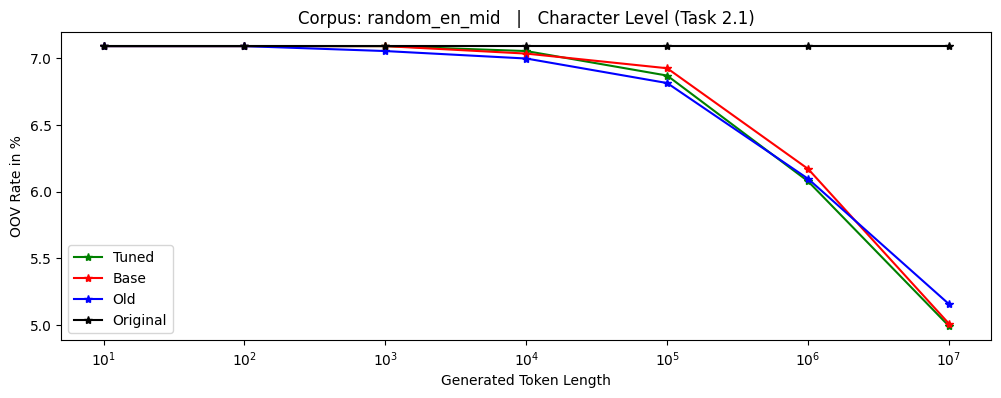

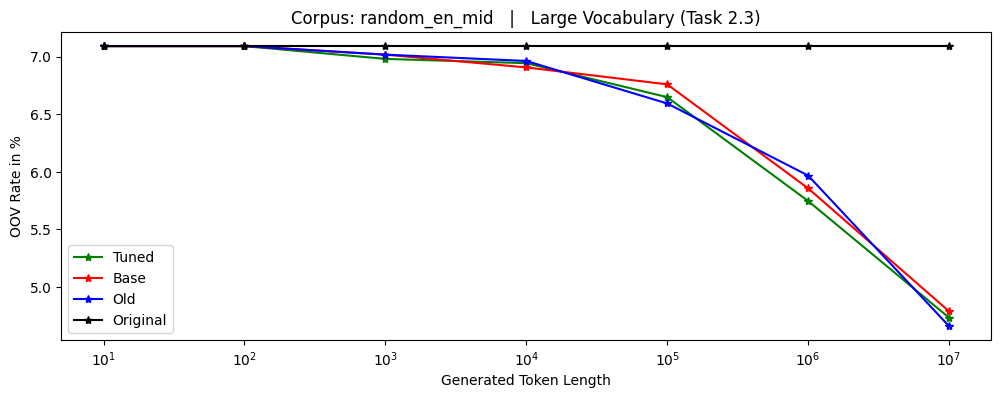

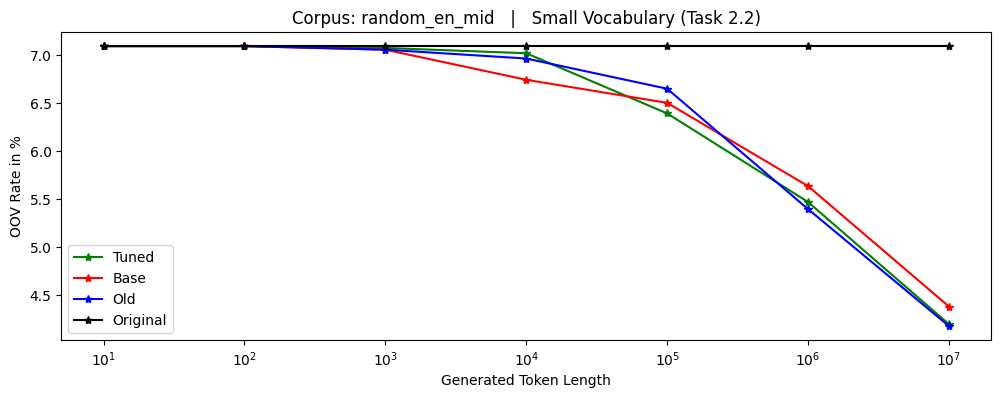

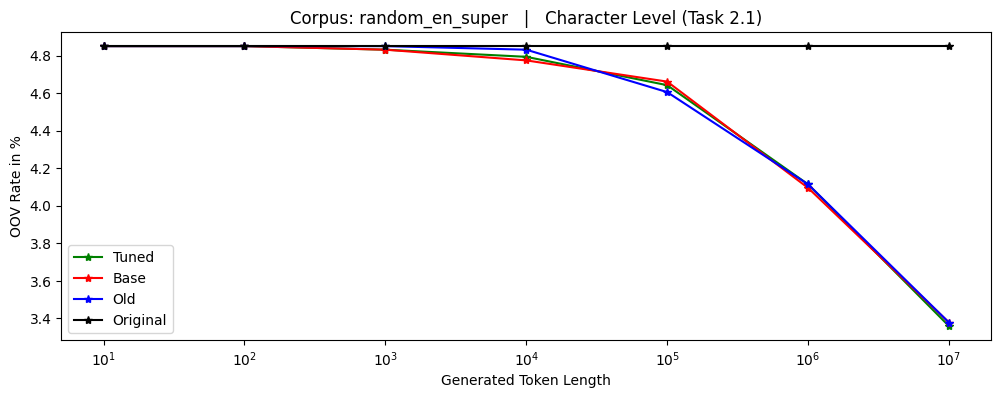

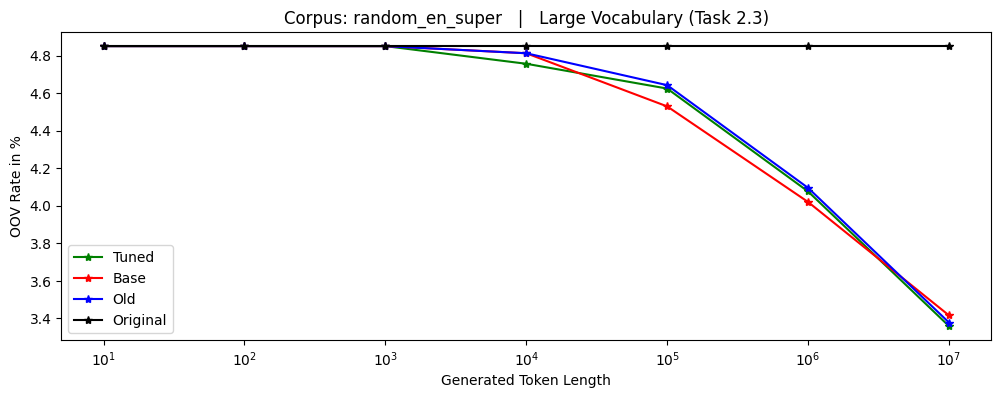

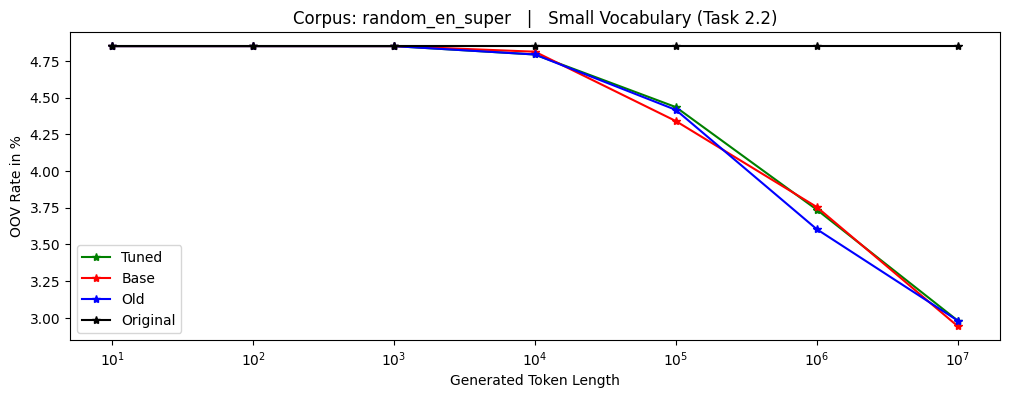

In [193]:
with open('plot_data.txt', 'r') as file:
    data = file.read()
    dct = json.loads(data)
    for key in dct:
            report_oov_plot(dct[key], key)

## **6. Analysis** (20 points)

Write a succinct summary of your observations for all the tasks, what you aimed to achieve, and whether your expectations were fulfilled. What are your takeaways from this project? How do your results differ for English and Bengali? What hyperparameters do you use to optimise the OOV rates? Are there any ways you could improve your results?

For this section, we will also consider the overall style and how well-written the report is. You should write the summary in the same final Notebook you submit. It should be roughly 500-800 words.



# 1. Introduction:
-----------------------------
The problem we are going to address in this project is how to minimise OOV rate i.e., Out Of Vocabulary words(unseen words) in a corpus. Word representation cannot handle unseen or rare words well because language models assign 0 probability for such words which eventually leads to 0 MLE(Maximum Likelihood Estimation). There are a few ways in which we can overcome the above problem and we are going to discuss one such application in this project, namely, text generation by character embeddings and sub word representations. We will discuss in detail about them in the coming sections.

# 2. Problem Definition and Algorithm
--------------------------------------------------------------

There are many ways to handle OOV words but in this project we are interested in handling OOV words by Sub word units with different vocabulary sizes (smaller vocabulary and larger vocabulary), train a neural network and generate some artificial data from the trained models and compare the differences between character embeddings and Sub word units with different vocabulary sizes at different granularity levels and how they effect the overall performance of our models. Inorder to represent a word in subword unit we need to determine which co-ocurring characters should form a subword. This is done by using an algorithm called Byte-Pair-Encoding. For this project we are going to use the SentencePiece implementation of BPE. Coming to Neural network training we have used RNNs. An RNN can generate text from words as well as from characters.  

# 3. Experimental Evaluation

The pipeline of trials for our experiments are as follows:

- Data Preprocessing
- Subword Segmentation
- Language Model Training
- Text generation
- OOV Comparision

We have conducted our experiments in two corpus, one is English and the other is Bengali which are two completely independent corpus when it comes to context and language structure. Now we are going to discuss the sequence of trails below:

### 3.1. **Data Preprocessing:**
In order to strike the right balance, we have poured in lot of our efforts into preprocessing. Which is discussed below:

We have done 3 types of pre-processing on **English corpus**.
1. **Normal level preprocessing**: Extracted sentences first in usual format, split on the basic of end-of-the sentence punctuations, removing uncecessary punctuations and repeatations of punctuations. 
2. **Mid level preprocessing**: Everything that was done in Normal level, and removed all the numbers, punctuations.
3. **Super level preprocessing**: Everything that was done in Mid level plus Lowercased everything.
        
We have done 2 types of pre-processing on **Bengali corpus**.
1. **Normal level preprocessing**: Removed HTML tags, duplicate punctuations, extra back-to-back whitespaces, reducing      duplicate back-to-back punctuations to one, removing invalid character and unicodes, removing English-letter emojis,        removing English words/characters.
2. **Super level preprocessing**: Everything that was done in Normal level and removed all emojis, numbers, punctuations.
**More Information**: As Bengali corpus was biased, meaning - around first 30-40% extracted sentences were from some       sort of weird Bengali chats (including - slangs, swear-words, and etc etc.) and the rest were of religious topics. So       80-20% train and test will contain biased data. So, we shuffled and extracted sentences to see if that effects the OOV      rates. So we carried our experiments in two ways 1. Splitting the train and test data on normal corpus and 2. Splitting     the train and test data on the shuffled corpus on both English and Bengali the corpus.

### 3.2. **Subword Segmentation:**

We have created 3 types of vocabularies for our Language models to be trained in later sections based on different subword granularity levels like Character level,  Subword Units with smaller vocabulary, closer to characters and Subword Units with larger vocabulary, closer to words. Now, based on our preprocessing i.e., we have a total of 10 corpus, 5 types of normal corpus and another 5 types of shuffled corpus. Inorder to find a good vocabulary size that gives the best performance we can observe for larger vocabulary (task 2.3.3) got bigger segmentations of texts than task 2.3.2 and much variations in the vocabulary. Which is also, better for RNNLM. Our intuition is that by picking the vocabulary with bigger segmentations we will get lower OOV rates compared to 2.3.2 and 2.3.1. And, from Linguistic perspective, we will be able to find more natural meaning from texts.

### 3.3. **Language Model Training**

We have trained our RNNLM models on the SentencePiece files created on **Task 2.3**. We have run the model 3 times on all files at different granularity levels. Also, We have experimented with 3 different models each with different values of hyperparameters. Since in this task, our goal was to report a lower perplexity model, this doesn't necessarily reduce OOV rate. We have picked a model that gives the lowest difference in `Test_perplexity - Train_perplexity` value and based on that we have choosed our vocabulary from **Task 2.3.3** that gives the least difference between the train and test perplexities. Choosing the hyperparameters accordingly also makes the difference as they impact the text generation process. We were able to observe some non meaningful words with baseline trained model compared to our tuned model with same vocabulary.

### 3.4. **Text generation**

We have generated text of different orders of powers of 10 using rnnlm on both characters and subwords generated from **Task 2.3**. The text that are generated from character level are less and most of the words doesn't make any linguistic sense. Only a few common words are generated. Coming to texts that are generated from subwords most of the words make sense than compared to character level generated texts. This is because subwords already has some semantics and when trained using RNNs they generate much more meaningful tokens compared to character-level, when trained generates words based on all permutations of characters and most of them doesn't make sense. And even in the case of subwords, subwords with larger vocabulary generate far more meaningful words compared to subwords with smaller vocabulary. 

### 3.5. **OOV Comparision**
As per theory, higher the vocabulary lesser the OOV rate and we did observe this on all models with different granularity levels. And We compared OOV rates on our main preprocessing idea i.e., with shuffling or without shuffling the data and we found some interesting observations. Our main intuition for shuffling is that Bengali is morphologically rich language and that  shuffling the data might give best performance but to our surprise it didn't help and there is negligible difference in OOV rates between shuffled and normal preprocessed corpus. For English, shuffling the corpus did the trick and we were able to observe good difference in OOV rates compared to normal corpus.  


# 4. Conclusion

In Lecture, we have learnt about how to handle OOV words by using closed vocabulary. In project, we went a step ahead and analysed that we can effectively handle OOV words by using an open vocabulary generated by training the models at subword and character levels.

# 4) Grading

The project comprises 25% of the final grade. The grading for this project is distributed as follows:

- Data preparation (12 points)
- Subword units (16 points)
- LM training (20 points)
- Text generation (16 points)
- OOV comparison (16 points)
- Analysis (20 points)